# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 7: Airport Delays + Cluster Analysis

### Description

This week, we learned about clustering and how to prepare your data for clustering, as well as useful ways for storing and accessing your data. Now, we're going to apply each of the skills, as well as skills you've learned in previous courses, to successfully store, understand, prepare, and model your data using unsupervised learning methods.

You've been hired by the FAA as a consultant to analyze the operations of major airports around the country. The FAA wants to cut down on delays nationwide, and the most important part of this task is understanding the characteristics and groupings of airports based on a dataset of departure and operational delays.

- A certain degree of delay is expected in airport operations, however the FAA is noticing significant delays with certain airports
- When a flight takes off, it's departure delay is recorded in minutes, as well as operational data relating to this delay
- At the end of the year, this data is averaged out for each airport. Your datasets have these averaged for a 10 year range between 2004 and 2014
- Over this 10 year range, some delay times have not improved or have worsened.

**Point:** Your task is to understand the distribution, characteristics, and components of individual airports operations that are leading to these delays.

#### Project Summary

In this project, we're going to be using three different datasets related to airport operations. These include a dataset detailing the arrival and departure delays/diversions by airport, a dataset that provides metrics related to arrivals and departures for each airport, and a dataset that details names and characteristics for each airport code.

You will help the FAA:

- Organize and store their data so that they can easily understand it after your consulting work is done
- Mine and refine the data to uncover its basic attributes and characteristics
- Use your skills with PCA to uncover the core components of operations related to delays.
- Transfer your database to AWS so that FAA staff around the country can access your data and findings

When you've finished your analysis, the FAA would like a report detailing your findings, with recommendations as to which airports and operational characteristics they should target to decrease delays.

Here are some questions to keep in mind:

- What operational factors are most directly correlated to delays?
- Take a look at airports groupings - are there any relationships by region? Size?

For more instructions, follow the questions included in the starter code.

**Goal**: Completed Jupyter notebook that includes modeling using principal component analysis and an interpretation of your findings.

---

### Requirements

- Complete all of the tasks below:
 - Write a problem statement & describe the goals of your study to be included in the final report
 - Create a database to store your data; the FAA has dictated that you use PostgreSQL
 - Conduct Exploratory Data Analysis to understand the attributes of our data; include your EDA findings in your final report to the FAA
 - Mine & refine your data
 - Conduct a PCA to discover the principal components behind departure delays
 - Present the results of your findings in a formal report to the FAA, including the problem statement, summary statistics of the takeoff delays and operational delays, your PCA analysis detailing the principal components related to relays, and a case study on one specific airport that best illustrates your findings to FAA officials.


- ***Bonus:***
 - Plot your PCA analysis on a 3-dimensional graph
 - Copy your dataset and findings to your own AWS database for convenient FAA access.
 - Create a blog post from your notebook of at least 500 words (and 1-2 graphics!) that describes your project and includes your analysis, findings, and recommendations. Link to it in your Jupyter notebook.


### Necessary Deliverables / Submission

- Materials must be in a clearly labeled Jupyter notebook, including:
 - Problem statement, goals, technical data, and link to AWS database (if applicable)
- Materials must be submitted via a Github PR to the instructor's repo.
- Materials must be submitted by the end of Week 7.

---

### Starter Code

[Open the starter code instructions in a Jupyter notebook.](./starter-code/) We will be using Scikit-Learn, matplotlib, and numpy for our unsupervised learning algorithms.

> Instructors: [Solution code is provided for you here](./solution-code/)

### Dataset

We'll be utilizing three datasets in this project:

- [airport_operations.csv](./assets/Airport_operations.csv)
- [airport_cancellations.csv](./assets/airport_cancellations.csv)
- [airports.csv](./airport_cancellations.csv)

Our goal is to use this data to uncover patterns in flight cancellations!

#### AWS Bonus

Here are some instructions

---

### Suggested Ways to Get Started**

- Read in your dataset
- Write pseudocode before you write actual code. Thinking through the logic of something helps.  
- Read the docs for whatever technologies you use. Most of the time, there is a tutorial that you can follow, but not always, and learning to read documentation is crucial to your success!
- Document **everything**.
- Look up sample executive summaries online.

### Useful Resources

- [Introduction to AWS and Python](https://aws.amazon.com/articles/3998)
- [Quora discussion on resources for writing consulting reports](https://www.quora.com/Are-there-any-management-consulting-report-templates-available)

---

### Project Feedback + Evaluation

[Attached here is a complete rubric for this project.](./project-07-rubric.md)

Your instructors will score each of your technical requirements using the scale below:

    Score | Expectations
    ----- | ------------
    **0** | _Incomplete._
    **1** | _Does not meet expectations._
    **2** | _Meets expectations, good job!_
    **3** | _Exceeds expectations, you wonderful creature, you!_

 This will serve as a helpful overall gauge of whether you met the project goals, but __the more important scores are the individual ones__ above, which can help you identify where to focus your efforts for the next project!



### Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [20]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn as sk 
import psycopg2 as psy
import seaborn as sns
from IPython.display import Image
from scipy.stats import normaltest

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### Read in the CSV files

In [59]:
df_raw = pd.read_csv("../assets/airport_cancellations.csv")
df = df_raw.dropna() 

In [60]:
cancellations_df = pd.read_csv('../assets/Airport_operations.csv')

In [61]:
airports_df = pd.read_csv('../assets/airports.csv')

#### convert all column names to lower case

In [24]:
def columns_to_lower(df):
    """lowercase all column names in a dataframe"""
    df.columns = [i.lower() for i in df.columns]
    
columns_to_lower(df)
columns_to_lower(airports_df)

### Intro: Write a problem statement / aim for this project

We want to understand the behavior of flight cancellations
Answer: 

#### Join all three csv files into one dataframe

In [25]:
combined_df = pd.merge(cancellations_df, airports_df, left_on='airport', right_on='locid')
all_data = pd.merge(combined_df, df, left_on=['airport', 'year'], right_on=['airport', 'year'])
all_data.shape

# combined_df.to_csv('/Users/gmaclenn/jupyter-notebooks/Projects/combined_airports.csv') # export for tableau analysis
# all_data.to_csv('/Users/gmaclenn/jupyter-notebooks/Projects/all_data.csv') # export for tableau analysis

(799, 32)

In [147]:
all_data['average_gate_departure_delay'].median()

12.54

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

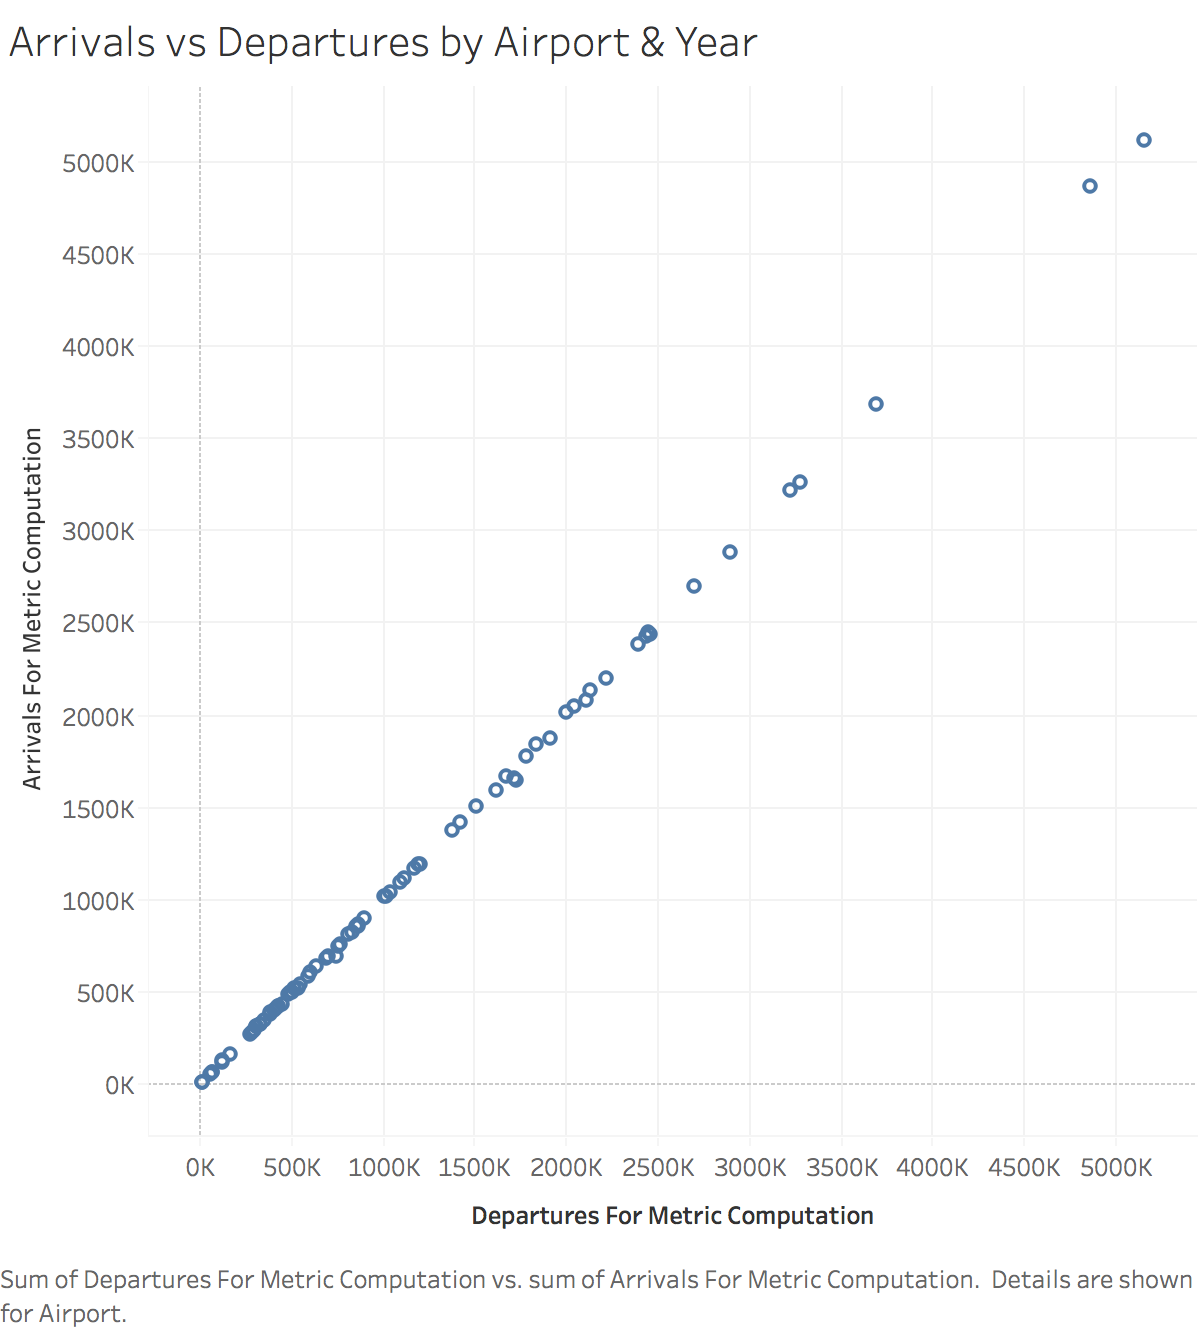

In [77]:
Image("/Users/gmaclenn/Desktop/arrivals_vs_departures.png", height=400, width=400)

Above we see there's an almost perfect correlation between arrivals and departures, which makes a whole lot of sense. 

Below we see a histogram that's a very good representation of a normal distribution.

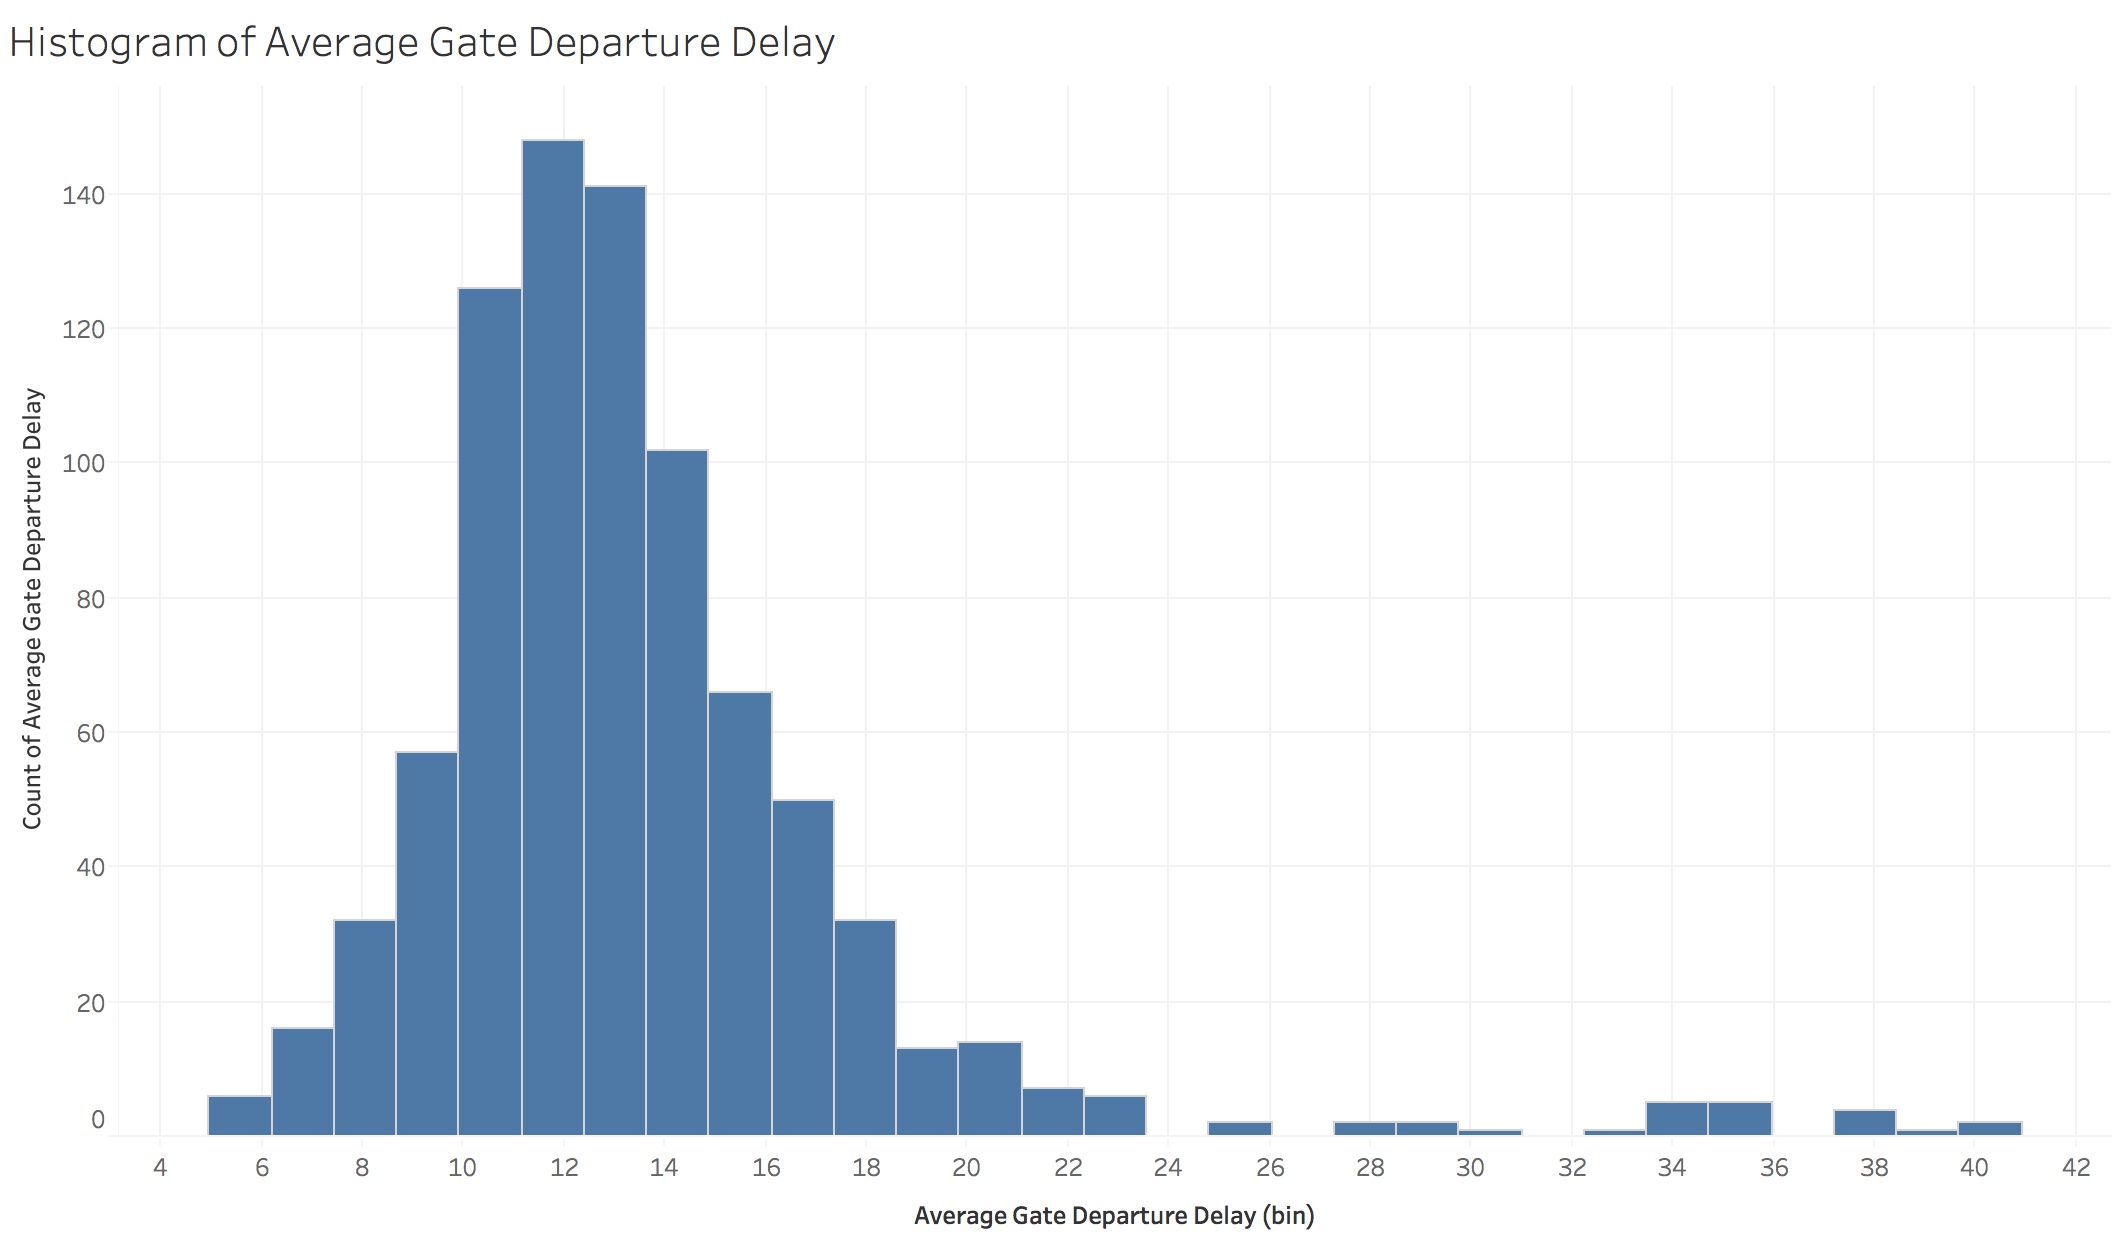

In [141]:
Image("/Users/gmaclenn/Desktop/gate_dep_delay_hist.png", height=400, width=800)

The image below shows this normal distribution within the color scheme. The size of the bubbles correspond to the total number of departures from a given airport and the red is roughly areas that have average gate departure delays in excess of the median. Where as white is roughly the median value at 12.54 minutes.

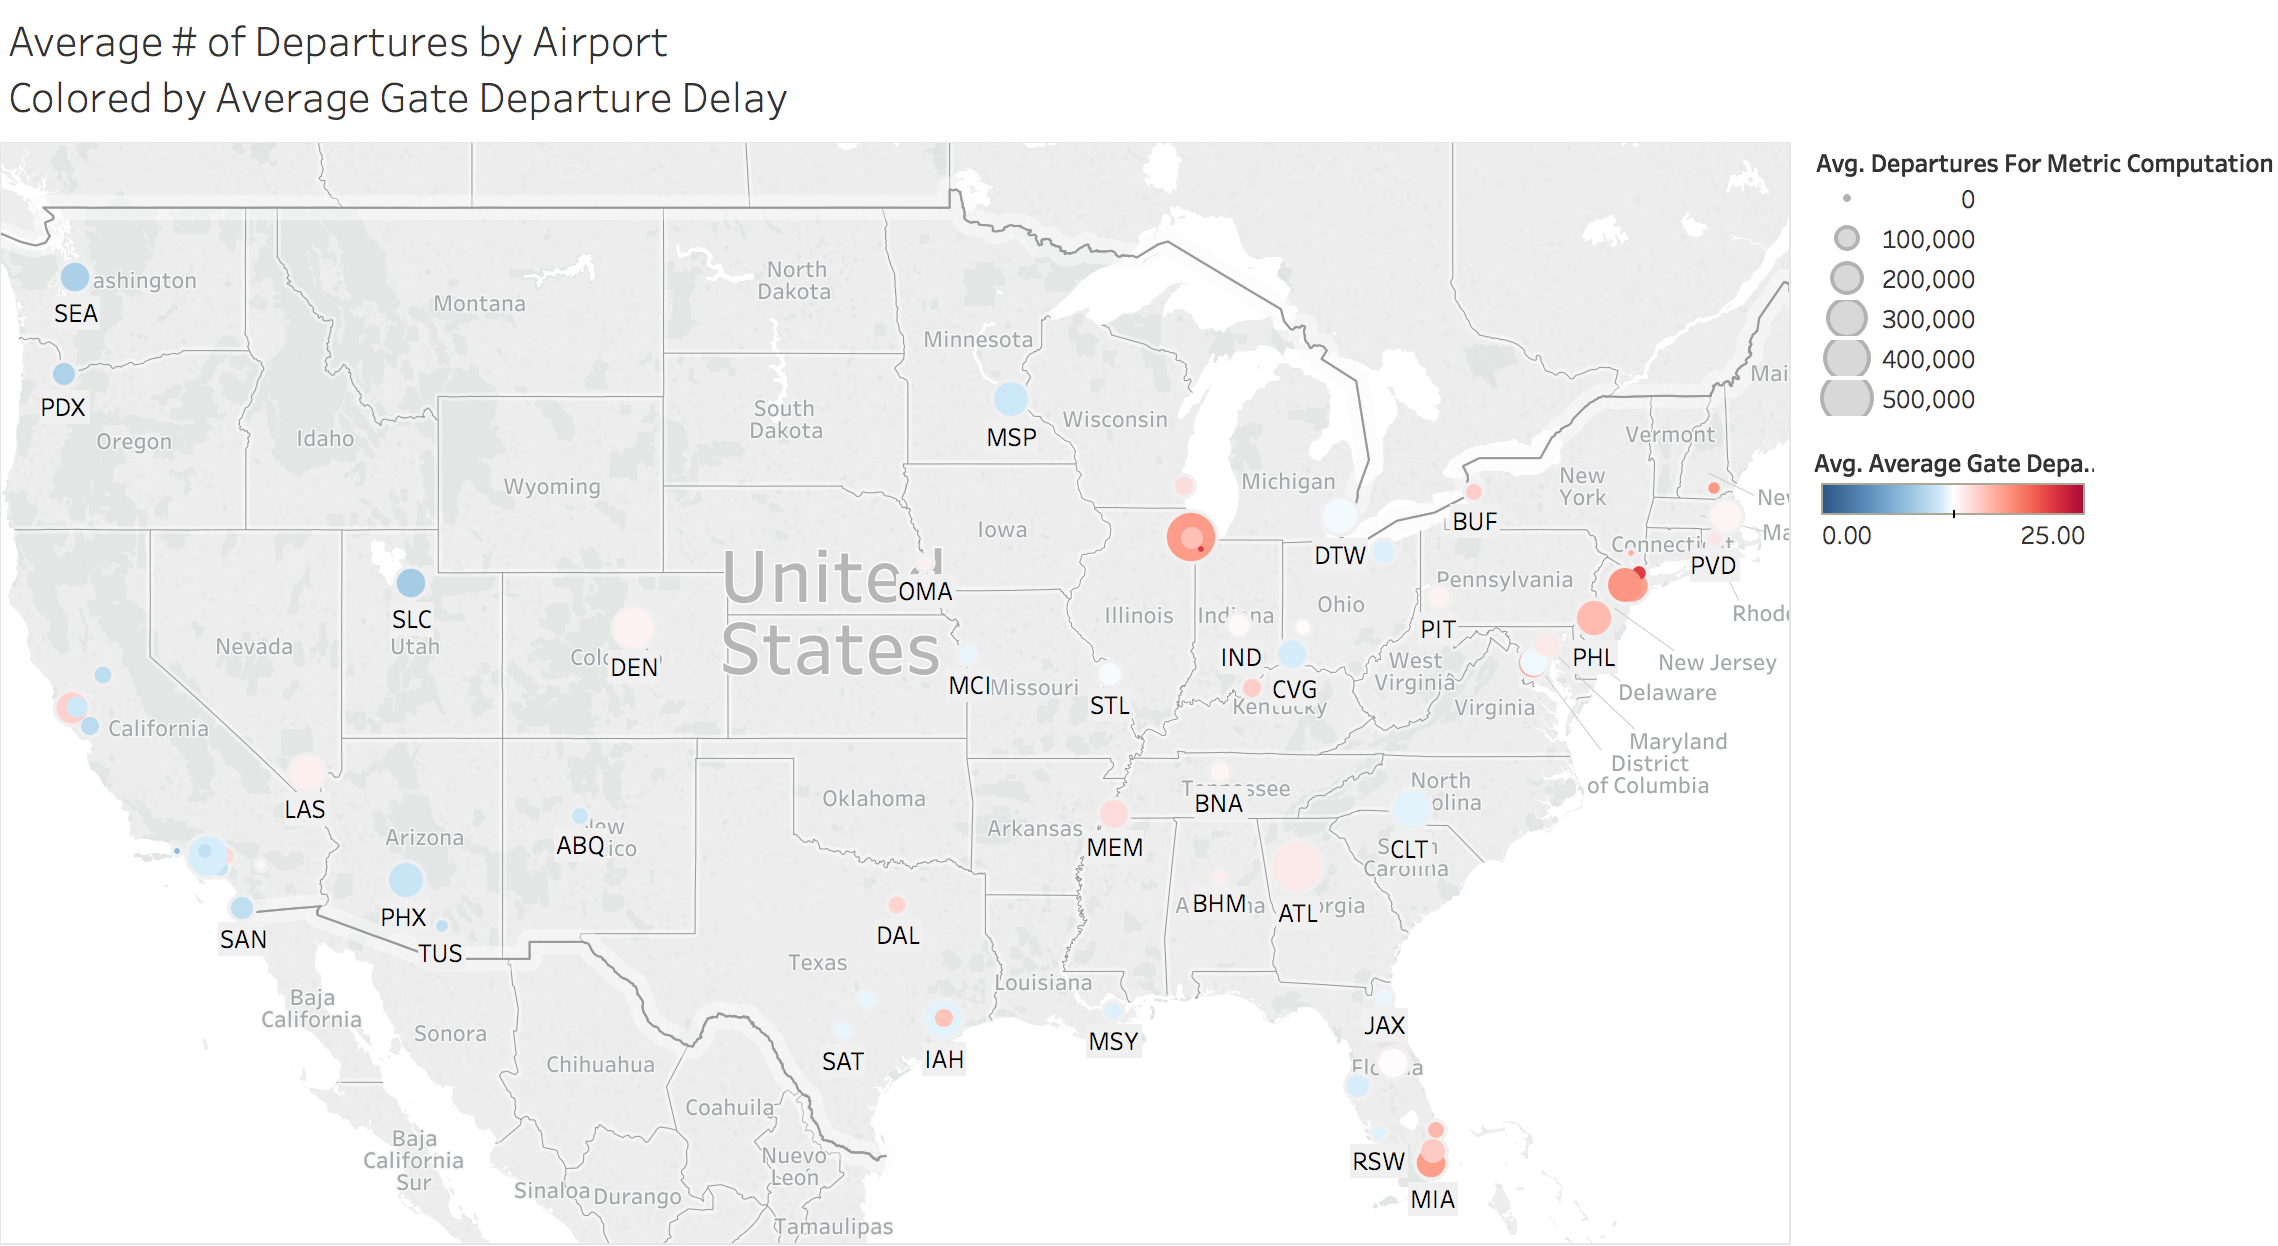

In [152]:
Image("/Users/gmaclenn/Desktop/avg_air_delay_map.png", height=400, width=900)

### Part 3: Data Mining

#### Drop unnecessary columns

In [153]:
drop_cols = ['key', 'locid', 'ap_name', 'alias', 'facility type', 'faa region', 'boundary data available', 'ap type',
            'county', 'city', 'state', 'latitude', 'longitude', 'airport']
airport_pca_data = all_data.drop(drop_cols, axis=1) # drops columns
airport_pca_data.head()

year  departures for metric computation  arrivals for metric computation  \
0  2004                              53971                            53818   
1  2005                              51829                            51877   
2  2006                              49682                            51199   
3  2007                              53255                            53611   
4  2008                              49589                            49512   

   percent on-time gate departures  percent on-time airport departures  \
0                           0.8030                              0.7809   
1                           0.8140                              0.7922   
2                           0.7983                              0.7756   
3                           0.8005                              0.7704   
4                           0.8103                              0.7844   

   percent on-time gate arrivals  average_gate_departure_delay  \
0                         0.7921                         10.38   
1                         0.8001                          9.60   
2                         0.7746                         10.84   
3                         0.7647                         11.29   
4                         0.7875                         10.79   

   average_taxi_out_time  average taxi out delay  \
0                   9.89                    2.43   
1                   9.79                    2.29   
2                   9.89                    2.16   
3                  10.34                    2.40   
4                  10.41                    2.41   

   average airport departure delay  average airborne delay  \
0                            12.10                    2.46   
1                            11.20                    2.26   
2                            12.33                    2.12   
3                            12.95                    2.19   
4                            12.32                    1.82   

   average taxi in delay  average block delay  average gate arrival delay  \
0                   0.83                 2.55                       10.87   
1                   0.89                 2.34                       10.24   
2                   0.84                 2.66                       11.82   
3                   1.29                 3.06                       12.71   
4                   1.03                 2.79                       11.48   

   departure cancellations  arrival cancellations  departure diversions  \
0                    242.0                  235.0                  71.0   
1                    221.0                  190.0                  61.0   
2                    392.0                  329.0                  71.0   
3                    366.0                  304.0                 107.0   
4                    333.0                  300.0                  79.0   

   arrival diversions  
0                46.0  
1                33.0  
2               124.0  
3                45.0  
4                42.0

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

In [30]:
nt = normaltest(airport_pca_data)
pd.DataFrame(nt.statistic, airport_pca_data.columns).T

year  departures for metric computation  \
0  610.353703                         223.196905   

   arrivals for metric computation  percent on-time gate departures  \
0                         223.8588                       126.797798   

   percent on-time airport departures  percent on-time gate arrivals  \
0                          139.050461                     124.982994   

   average_gate_departure_delay  average_taxi_out_time  \
0                     45.271711              295.08864   

   average taxi out delay  average airport departure delay  \
0              462.206575                        194.81533   

   average airborne delay  average taxi in delay  average block delay  \
0              142.948128             254.269703           110.955445   

   average gate arrival delay  departure cancellations  arrival cancellations  \
0                  135.432052               677.343964             672.856982   

   departure diversions  arrival diversions  
0             336.47828          540.328891

#### 4.2 Find correlations in the data

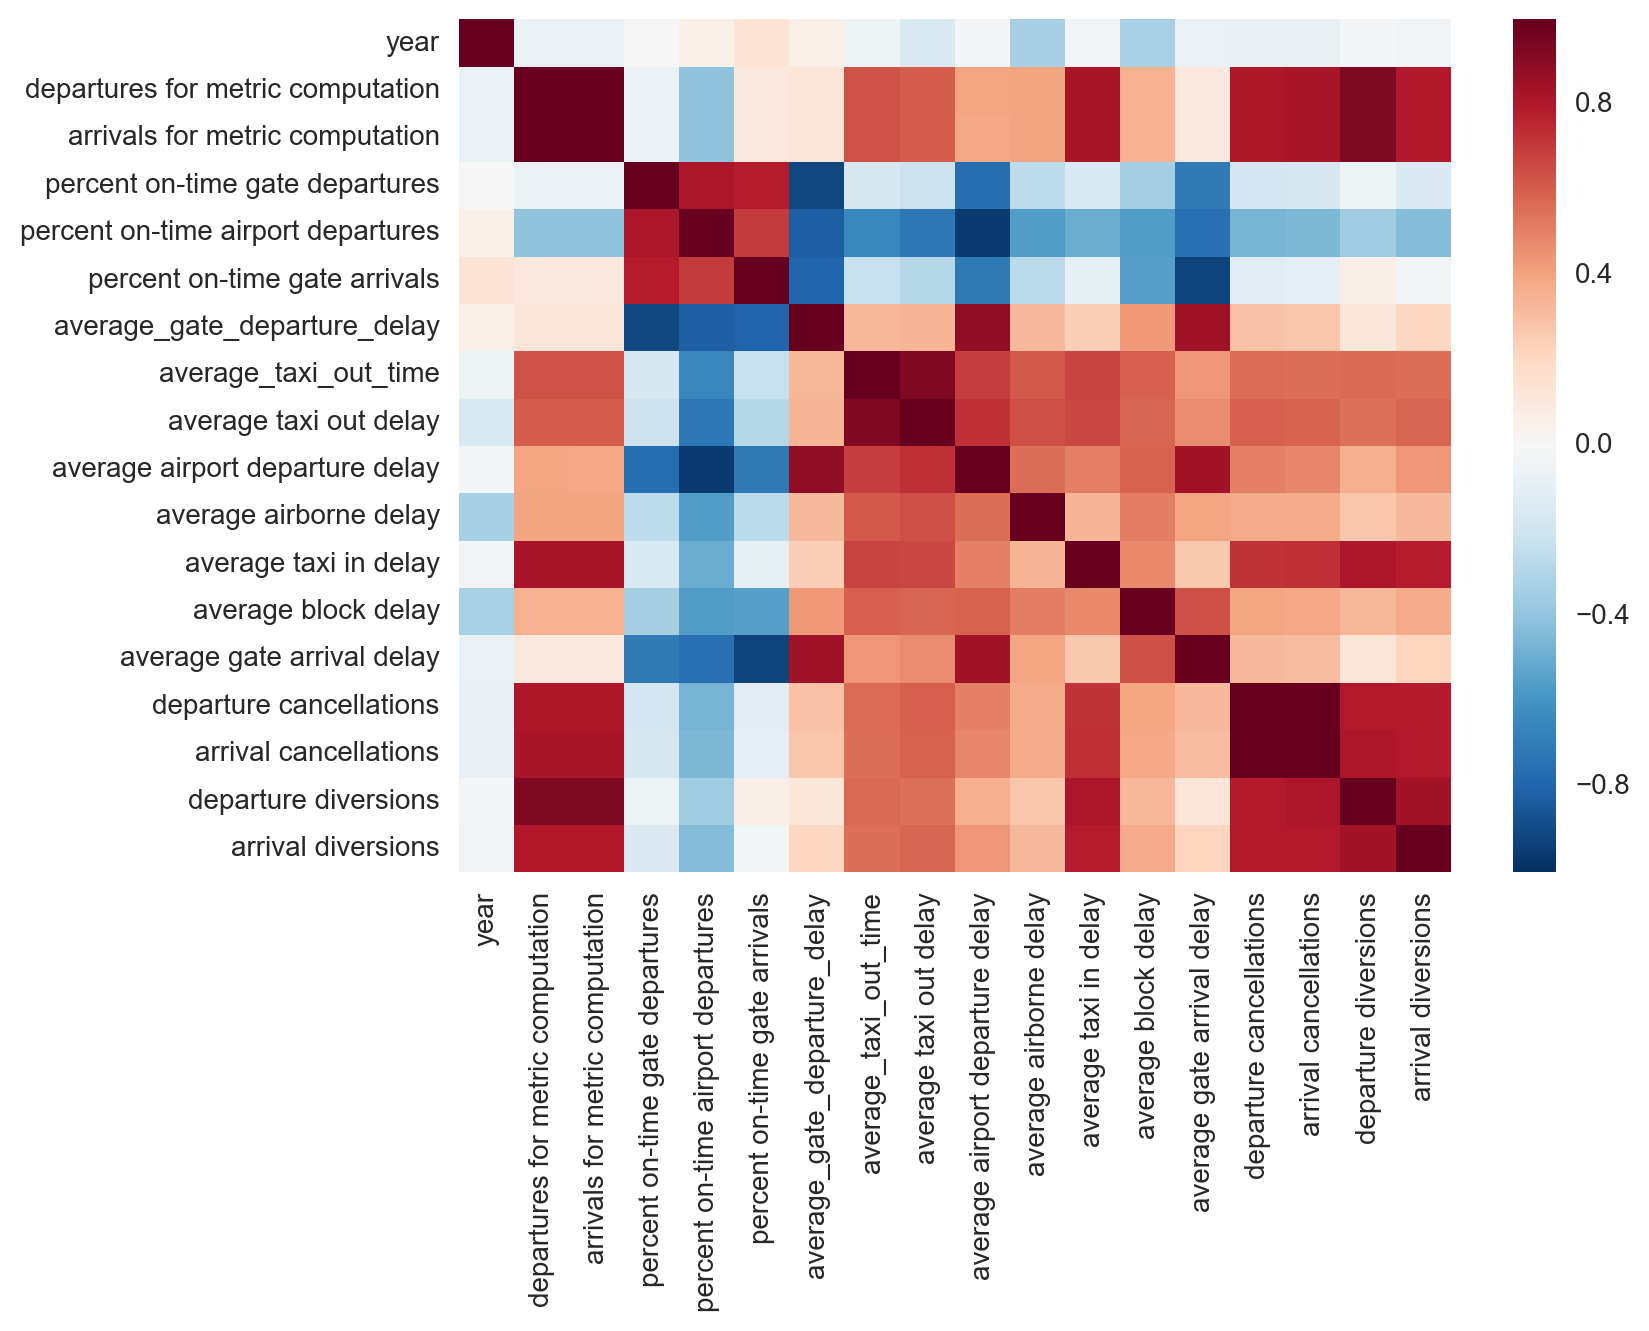

In [32]:
corrmat = airport_pca_data.corr()
sns.heatmap(corrmat)

#### Strong correlations:
* Total Departures & Arrivals
* Total Departures/Arrivals & Departure/Arrival Cancellations and Diversions
* Avg. Gate Departure Delay & Avg. Gate Arrival Delay
* All cancellations/Deversions & Avg. Taxi in Delay
* Departures/Cancellations & themselves

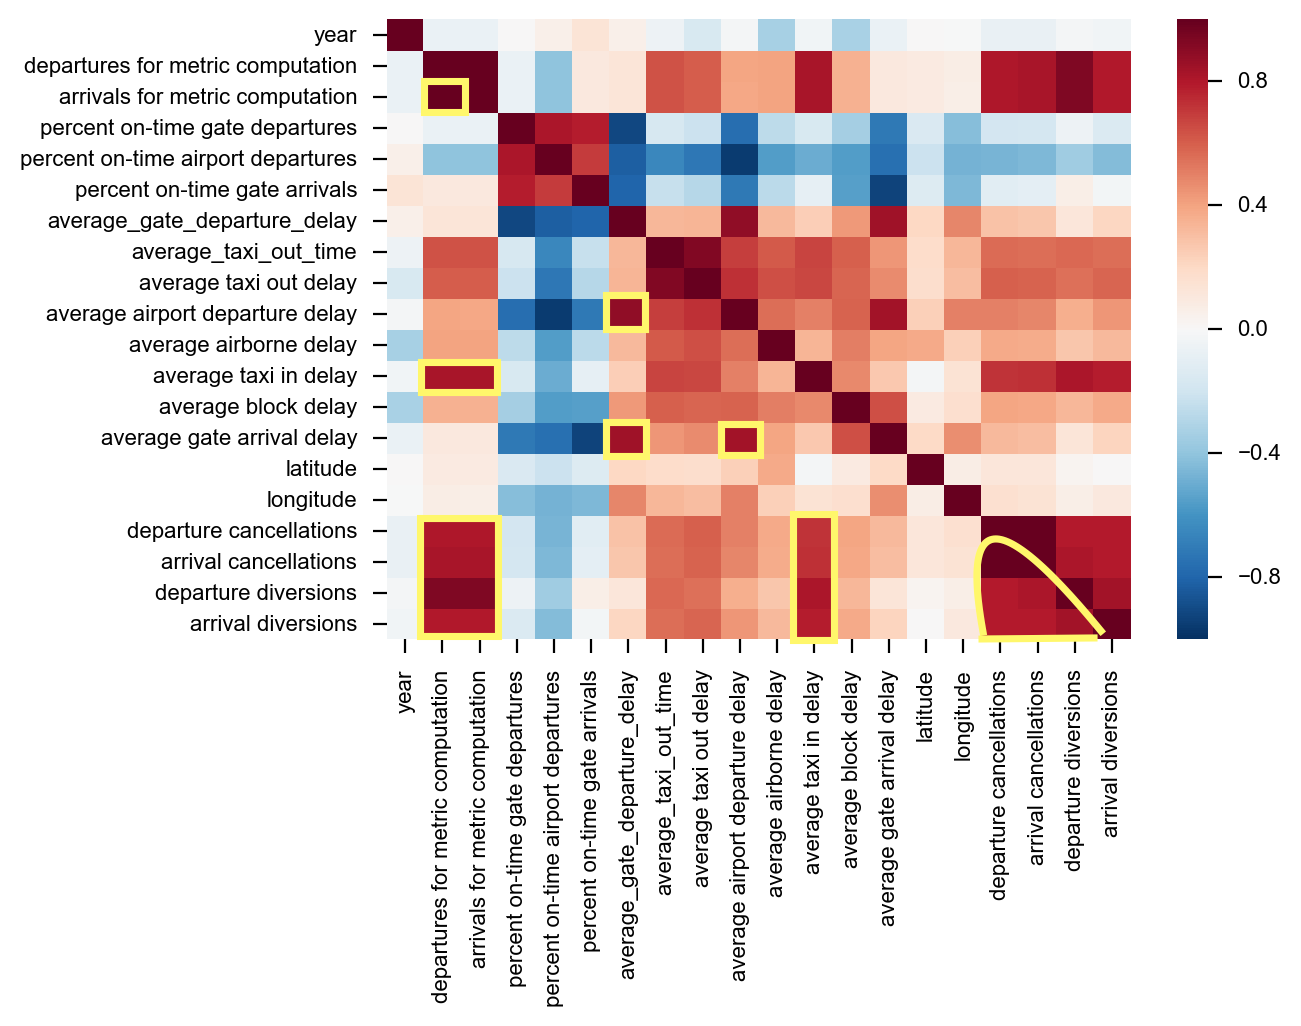

In [85]:
Image('/Users/gmaclenn/Desktop/airport_pca_heatmap copy.png', height=840, width=840)

#### What is the value of understanding correlations before PCA? 

In looking at the correlations prior to performing PCA we can get an idea for what variables are highly correlated with eachother. In this regard we can see variables that are likely to be diminished as they explain the same variance.

## Perform a PCA

#### Prepare data for PCA analysis

In [86]:
# split the dataframe into X and y values
X, y = airport_pca_data.iloc[:, 1:].values, airport_pca_data.iloc[:, 0].values

#### Standardize the data using the StandardScaler

In [87]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_std = ss.fit_transform(X)

#### From the covariance matrix calculate the eigenvalues and eigen vectors

In [2]:
cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

NameError: name 'np' is not defined

In [37]:
print eigen_vals

[  9.17680918e+00   4.16210652e+00   1.21645796e+00   6.50383255e-01
   5.10203215e-01   4.20437718e-01   2.47407511e-01   1.90068175e-01
   1.65777857e-01   1.43298219e-01   6.19936947e-02   5.37682509e-02
   1.49627279e-02   4.86205637e-03   1.71481675e-04   9.58506528e-04
   1.63693067e-03]


In [1]:
eigen_vals

NameError: name 'eigen_vals' is not defined

In [103]:
tot = sum(eigen_vals) # totals the eigen values
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] # var_exp ratio is fraction of eigen_val to total sum
cum_var_exp = np.cumsum(var_exp) # calculate the cumulative sum of explained variances

Here we can see what perentage of the variance is explained by each principal component, since we are sorted
by the magnitude of the eigenvalues


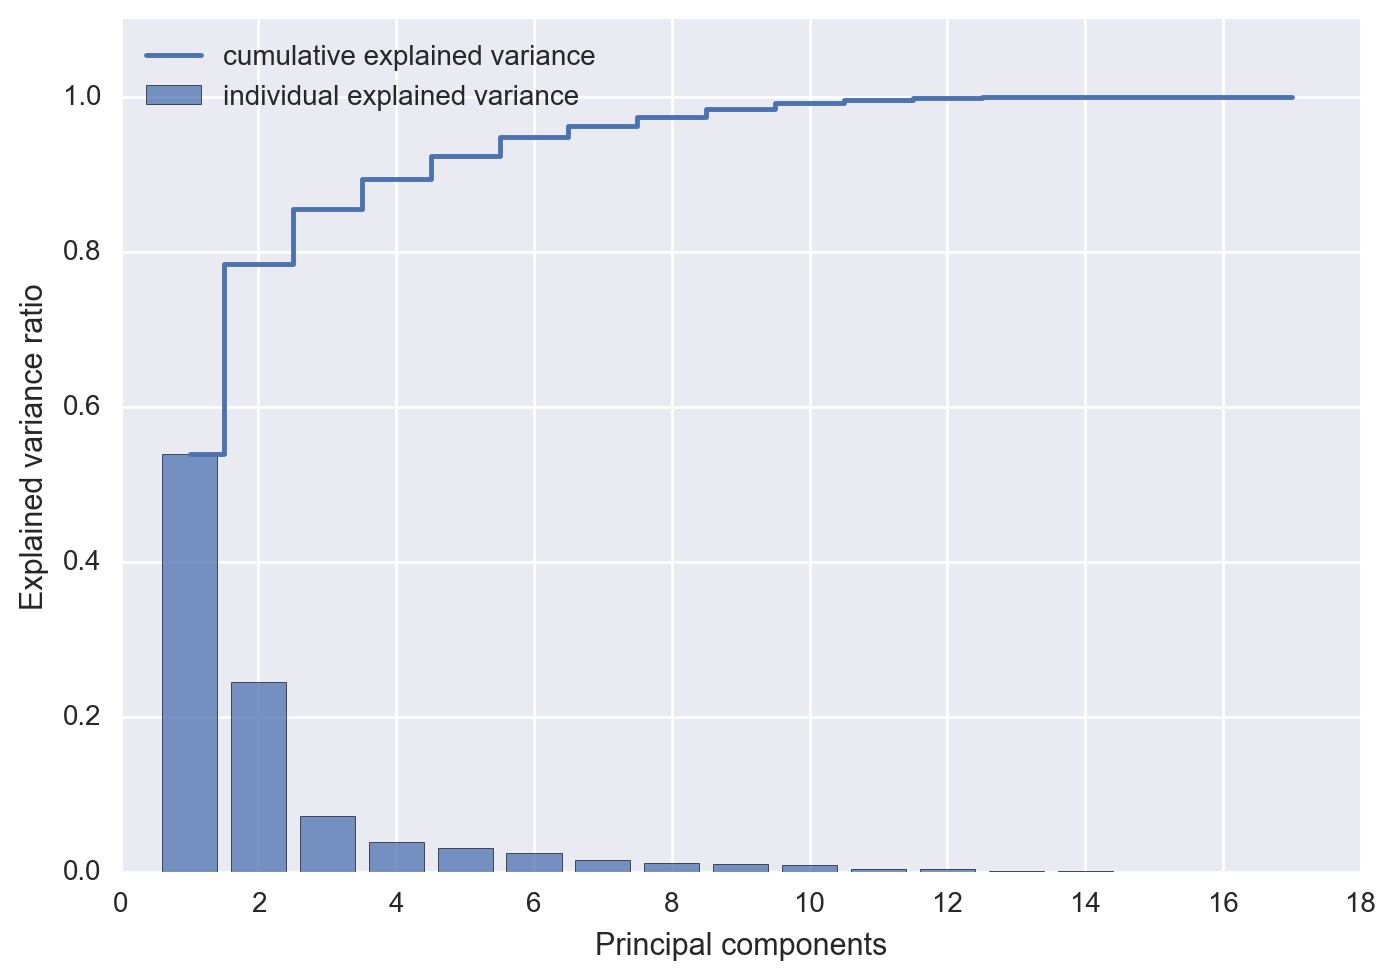

In [106]:
import matplotlib.pyplot as plt

plt.bar(range(1,18), var_exp, alpha=0.75, align='center', label='individual explained variance')
plt.step(x=range(1,18), y=cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylim(0, 1.1)
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
print "Here we can see what perentage of the variance is explained by each principal component, since we are sorted"
print "by the magnitude of the eigenvalues"
plt.show()

## What does this tell us?

#### The first two principal components combined explain almost 80% of the variance in the data. The first three components explain 85% of all the variance in the data.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # PCA with 2 primary components
pca_3 = PCA(n_components=3) #PCA with 3 primary components

# fit and transform both PCA models
X_pca = pca.fit_transform(X_std)
X_pca_3 = pca_3.fit_transform(X_std)

In [88]:
print X_pca.shape, X_pca_3.shape # (rows, n_components)

(799, 2) (799, 3)


Here we're able to see our airport data in our 2-d feature subspace
There's still quite a bit of noise and not a clear delineation in the 2-d feature subspace


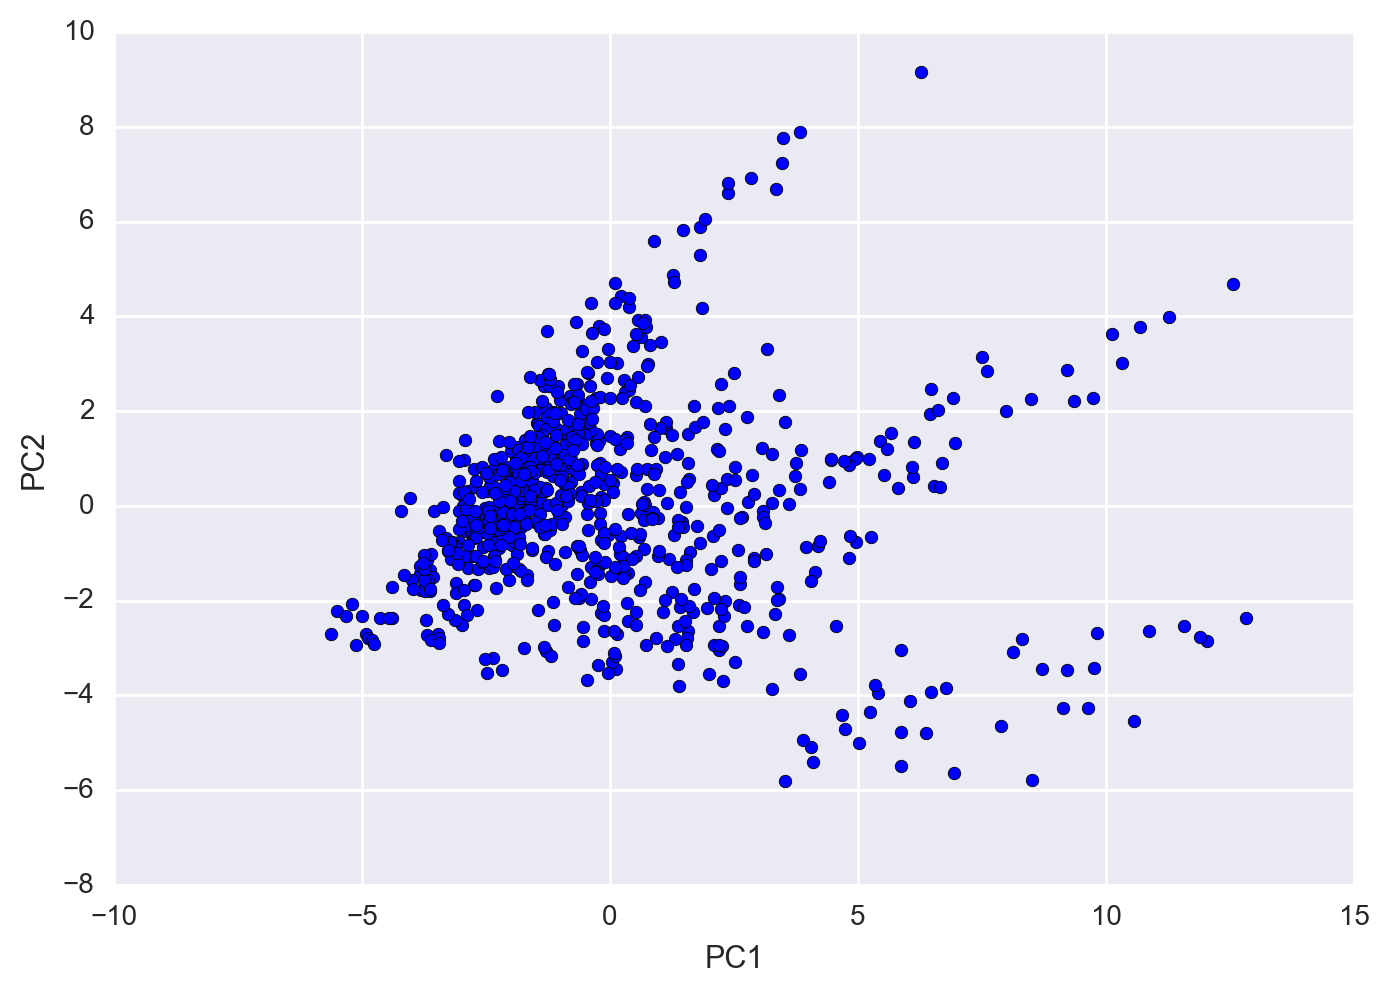

In [108]:
plt.scatter(X_pca.T[0], X_pca.T[1], c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
print "Here we're able to see our airport data in our 2-d feature subspace"
print "There's still quite a bit of noise and not a clear delineation in the 2-d feature subspace"
plt.show()

### We'll see if adding a third principal component allows for better distinction between datapoints

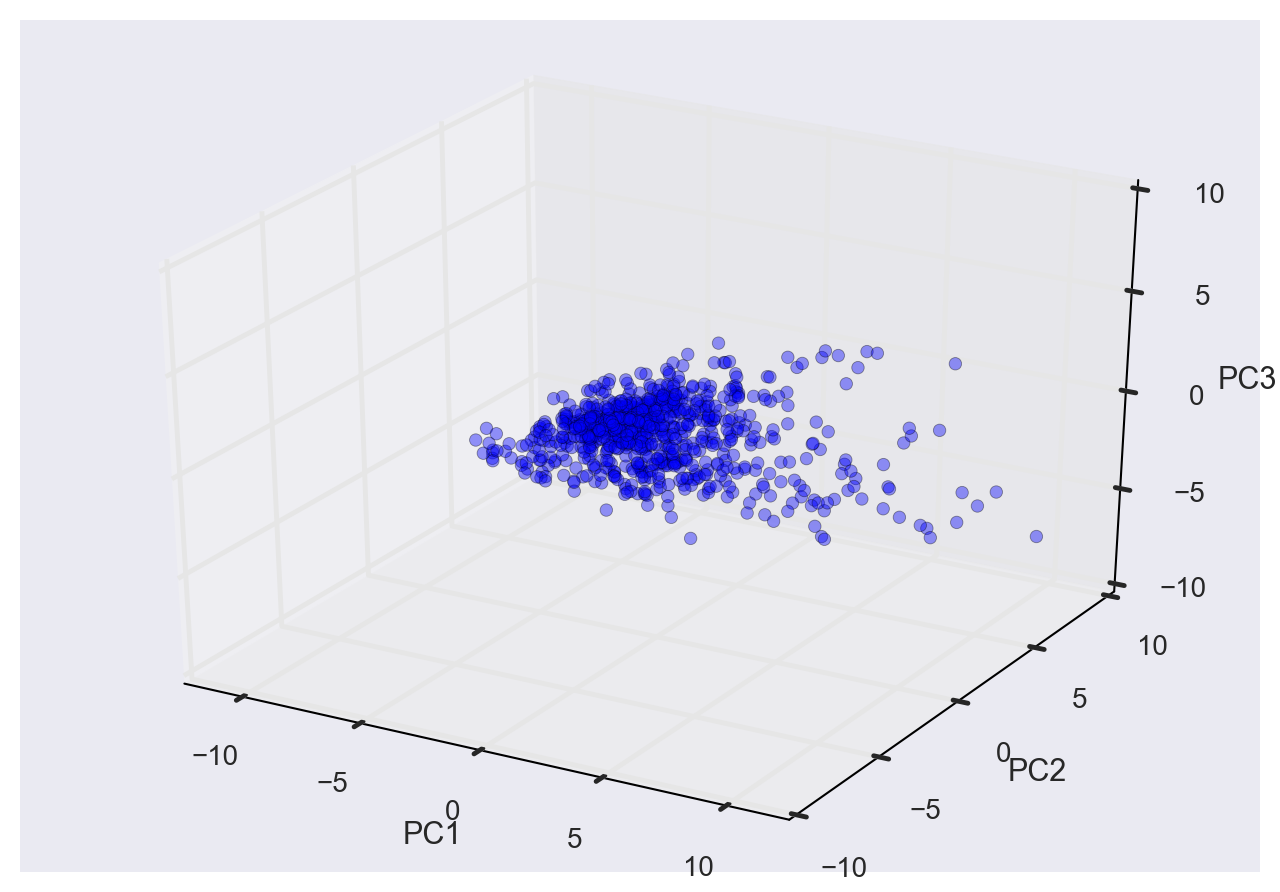

In [90]:
from mpl_toolkits.mplot3d import Axes3D

# initialize figure and 3d projection for the PC3 data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# assign x,y,z coordinates from PC1, PC2 & PC3
xs = X_pca_3.T[0]
ys = X_pca_3.T[1]
zs = X_pca_3.T[2]

# initialize scatter plot and label axes
ax.scatter(xs, ys, zs, alpha=0.4, c='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# set axes limits
ax.set_xlim3d(-12,12)
ax.set_ylim3d(-10,10)
ax.set_zlim3d(-10,10)

plt.show()

#### In my opinion adding PC3 does not help differentiate the data significantly.

#### Another way to access the explained variance ratio.

In [46]:
pca_none = PCA(n_components=None) # initializing the PCA class with n_components=None
X_std_none = pca_none.fit_transform(X_std)
np.cumsum(pca.explained_variance_ratio_[:]) # access the explained_variance_ratio attribute from the PCA class

array([ 0.5391367 ,  0.78366007])

## Using KMeans to cluster the Principal Components

### Use the elbow method to approximate the optimal number of clusters

As we can see here there's not a clear optimal # of clusters based on the SSE values within each cluster


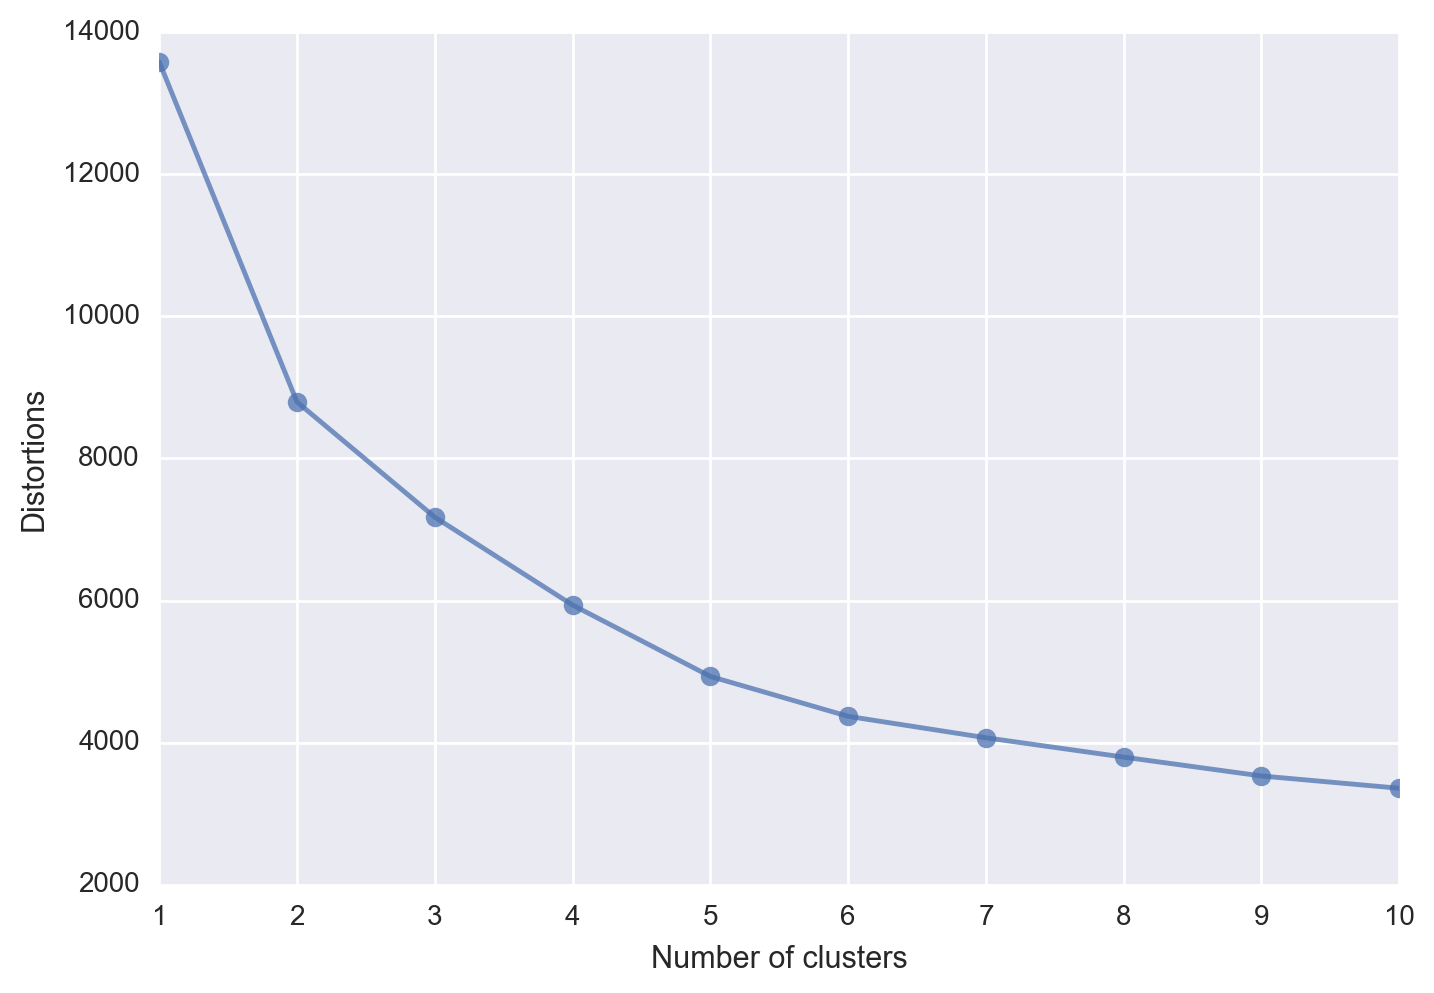

In [109]:
distortions = [] # sum of squared error within the each cluster
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X_std)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o', alpha=0.75)
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
print "As we can see here there's not a clear optimal # of clusters based on the SSE values within each cluster"
plt.show()

## We'll choose K=3 but also look at K=2 and K=4

In [91]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X_pca)

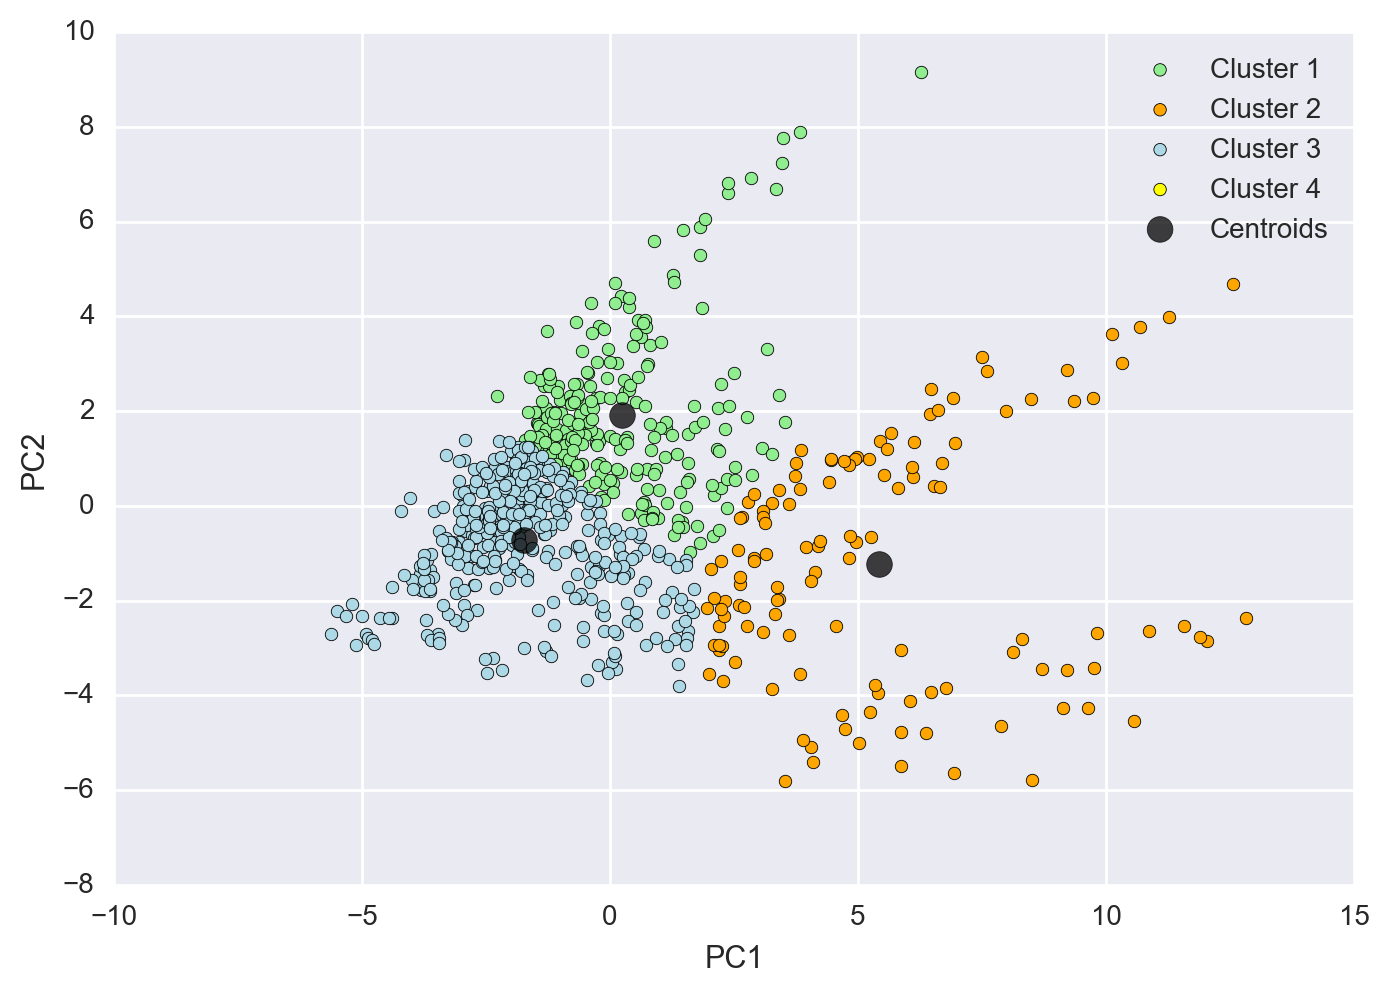

In [92]:
plt.scatter(X_pca[y_km==0, 0],
           X_pca[y_km==0, 1],
           c='lightgreen',
           label='Cluster 1')
plt.scatter(X_pca[y_km==1, 0],
           X_pca[y_km==1, 1],
           c='orange',
           label='Cluster 2')
plt.scatter(X_pca[y_km==2, 0],
           X_pca[y_km==2, 1],
           c='lightblue',
           label='Cluster 3')
plt.scatter(X_pca[y_km==3, 0],
           X_pca[y_km==3, 1],
           c='yellow',
           label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=85,
           alpha=0.75,
           marker='o',
           c='black',
           label='Centroids')

plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.savefig('/Users/gmaclenn/Desktop/2_clusters.png', dpi=300)
plt.show()

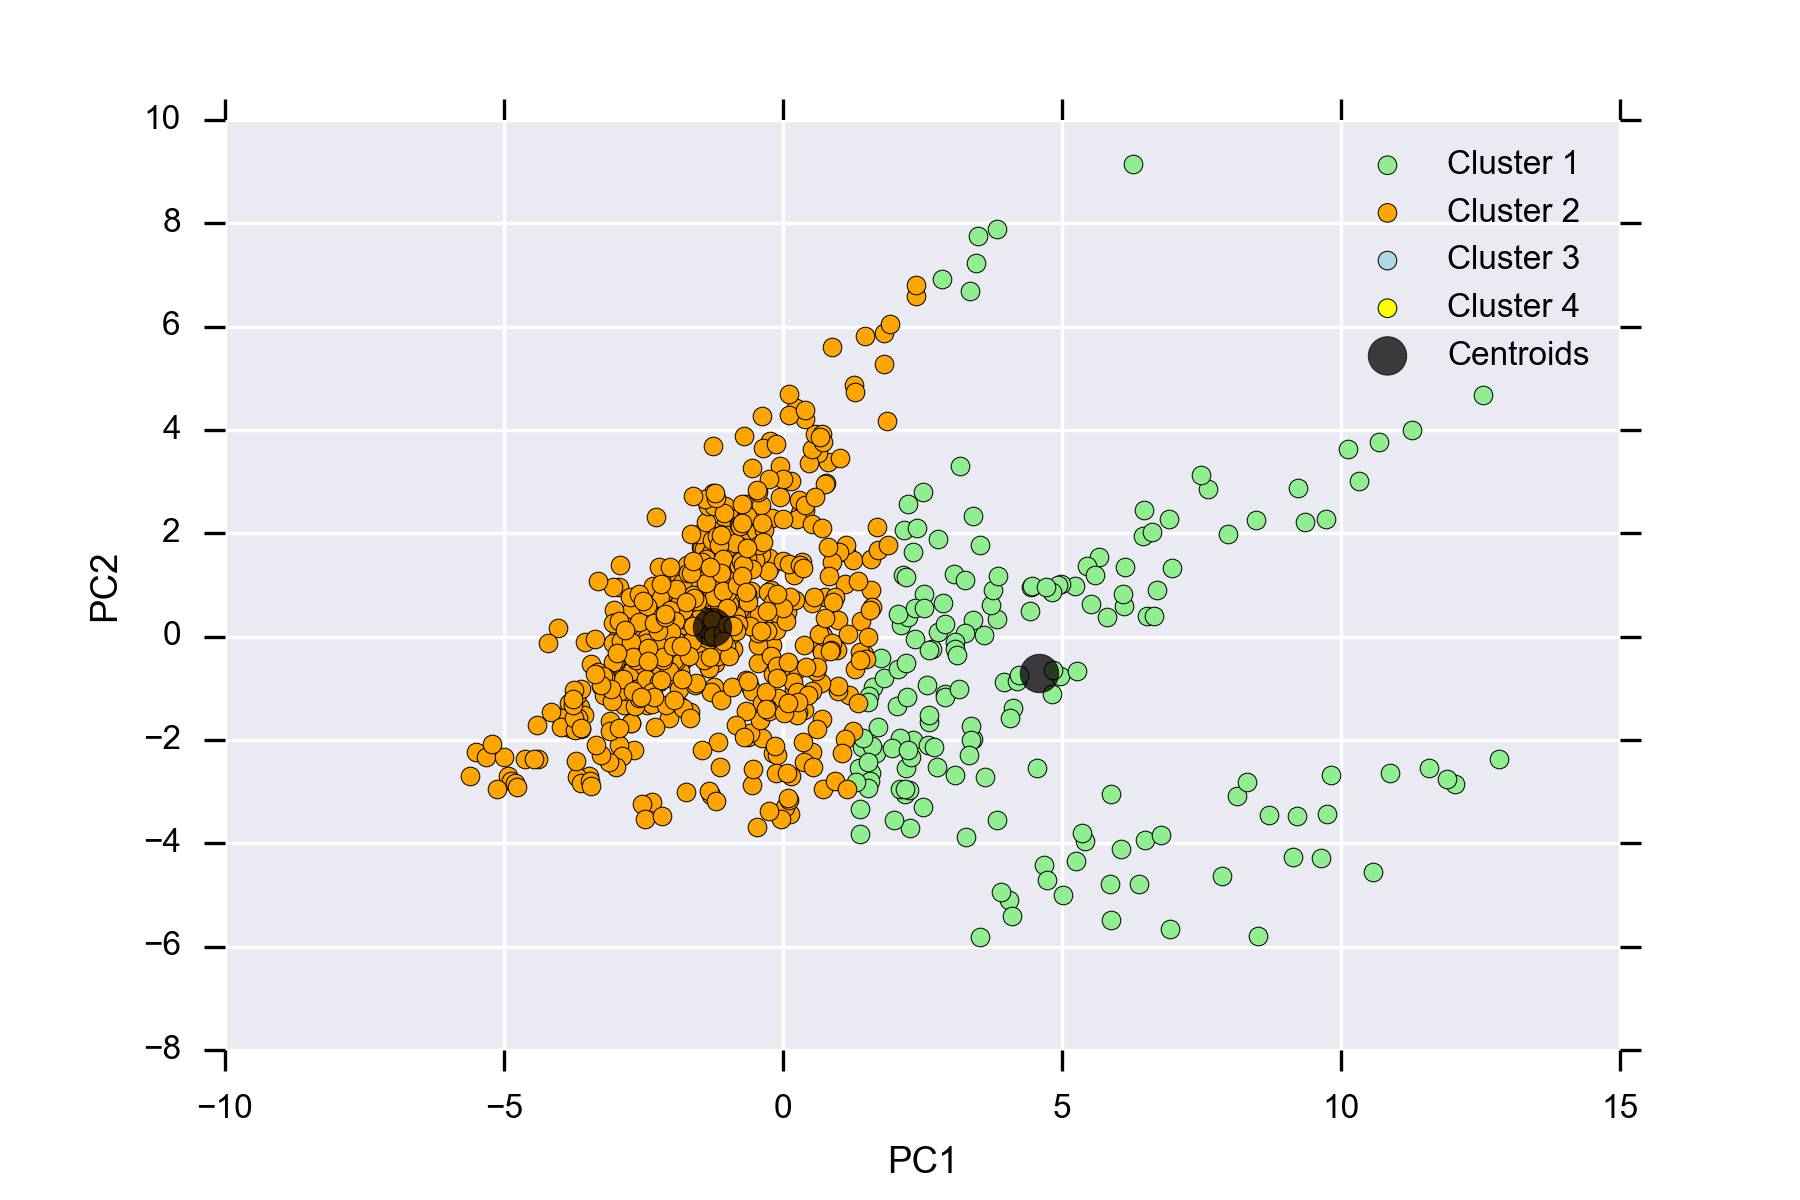

In [99]:
Image('/Users/gmaclenn/Desktop/2_clusters.png', height=700, width=700)

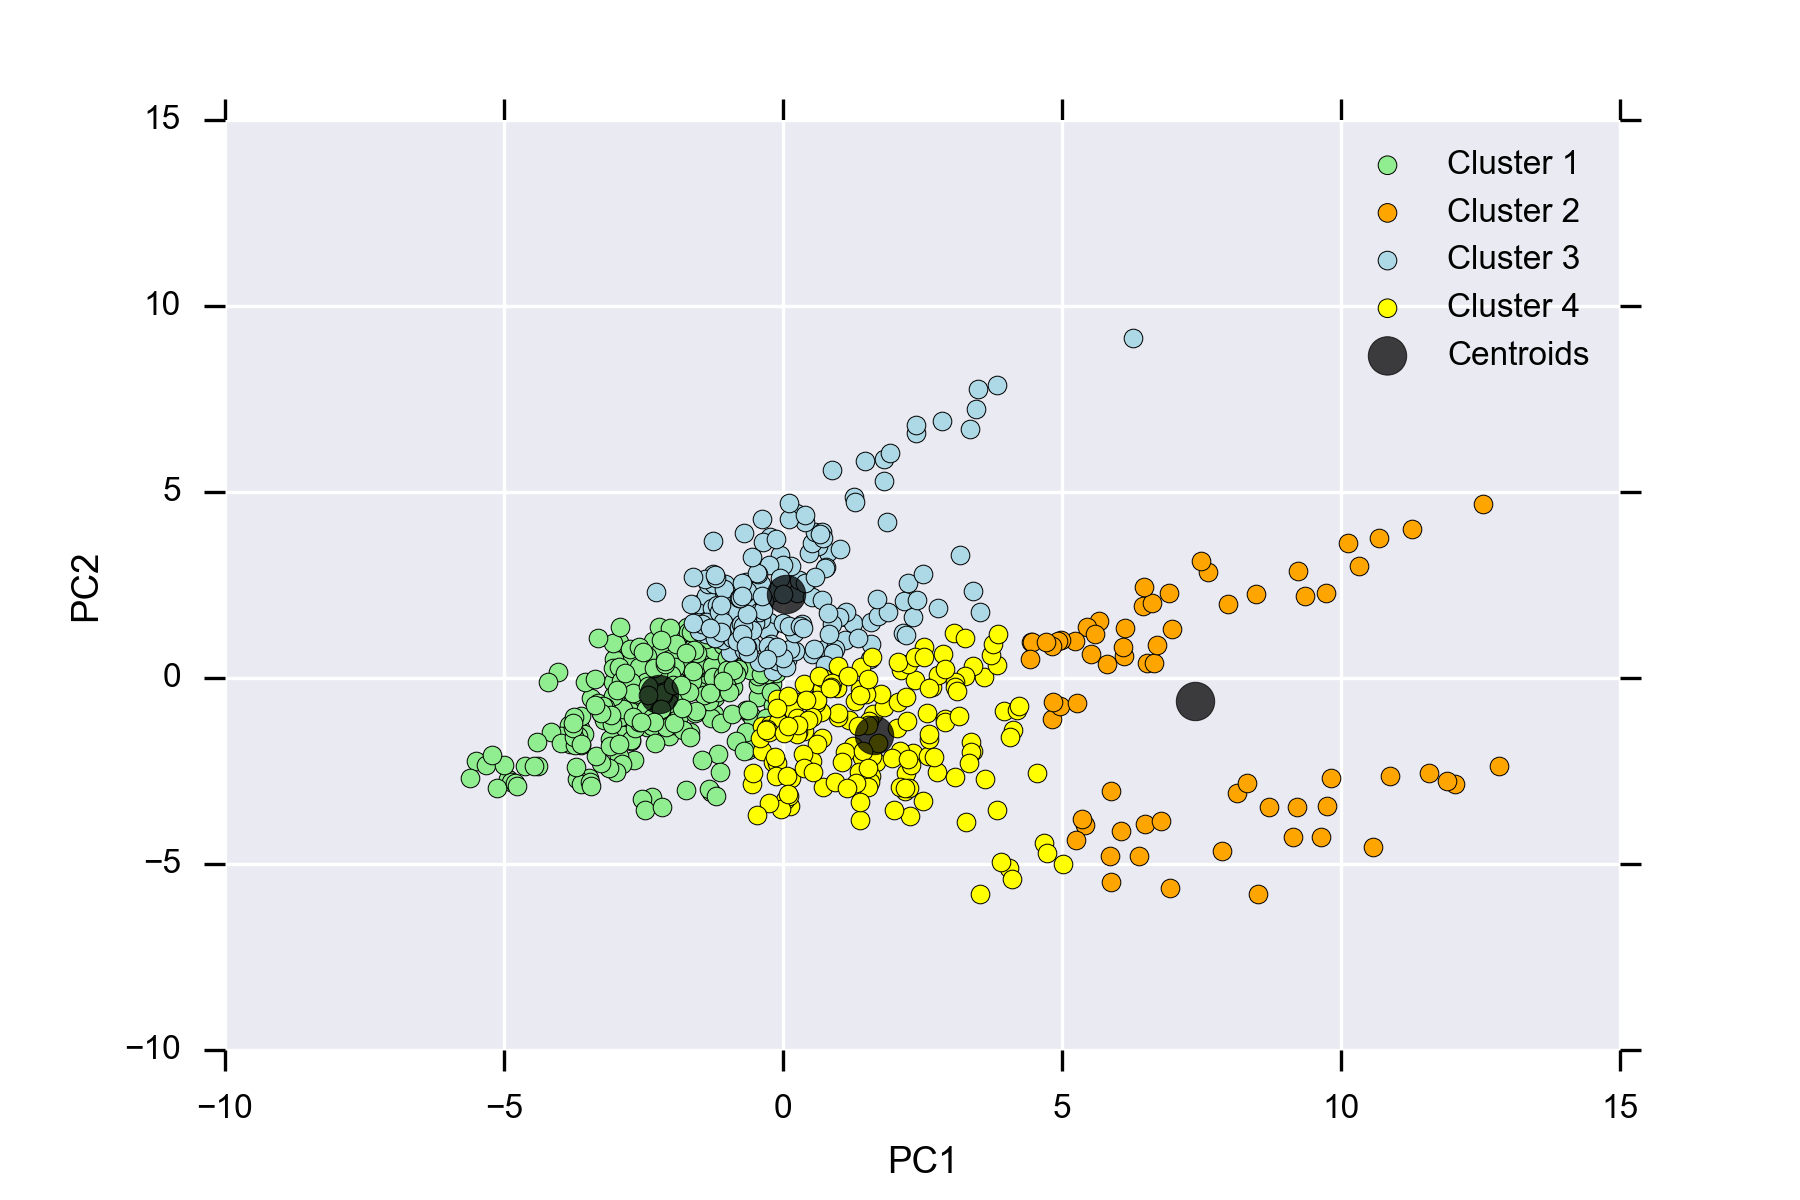

In [102]:
Image('/Users/gmaclenn/Desktop/4_clusters.png', height=700, width=700)

## It looks like we're still missing some of the data that's down in the bottom right corner. Let's see if DBSCAN will help pull that data out.

# Using DBScan as an alternative clustering method

In [137]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.75, 
             min_samples=5)

y_dbs = dbs.fit_predict(X_pca)

DBSCAN does not appear to do much better, given that there's not a clear separation between points here 
There are also a number of bridge points ('noise') that's not allowing for clear seperation.


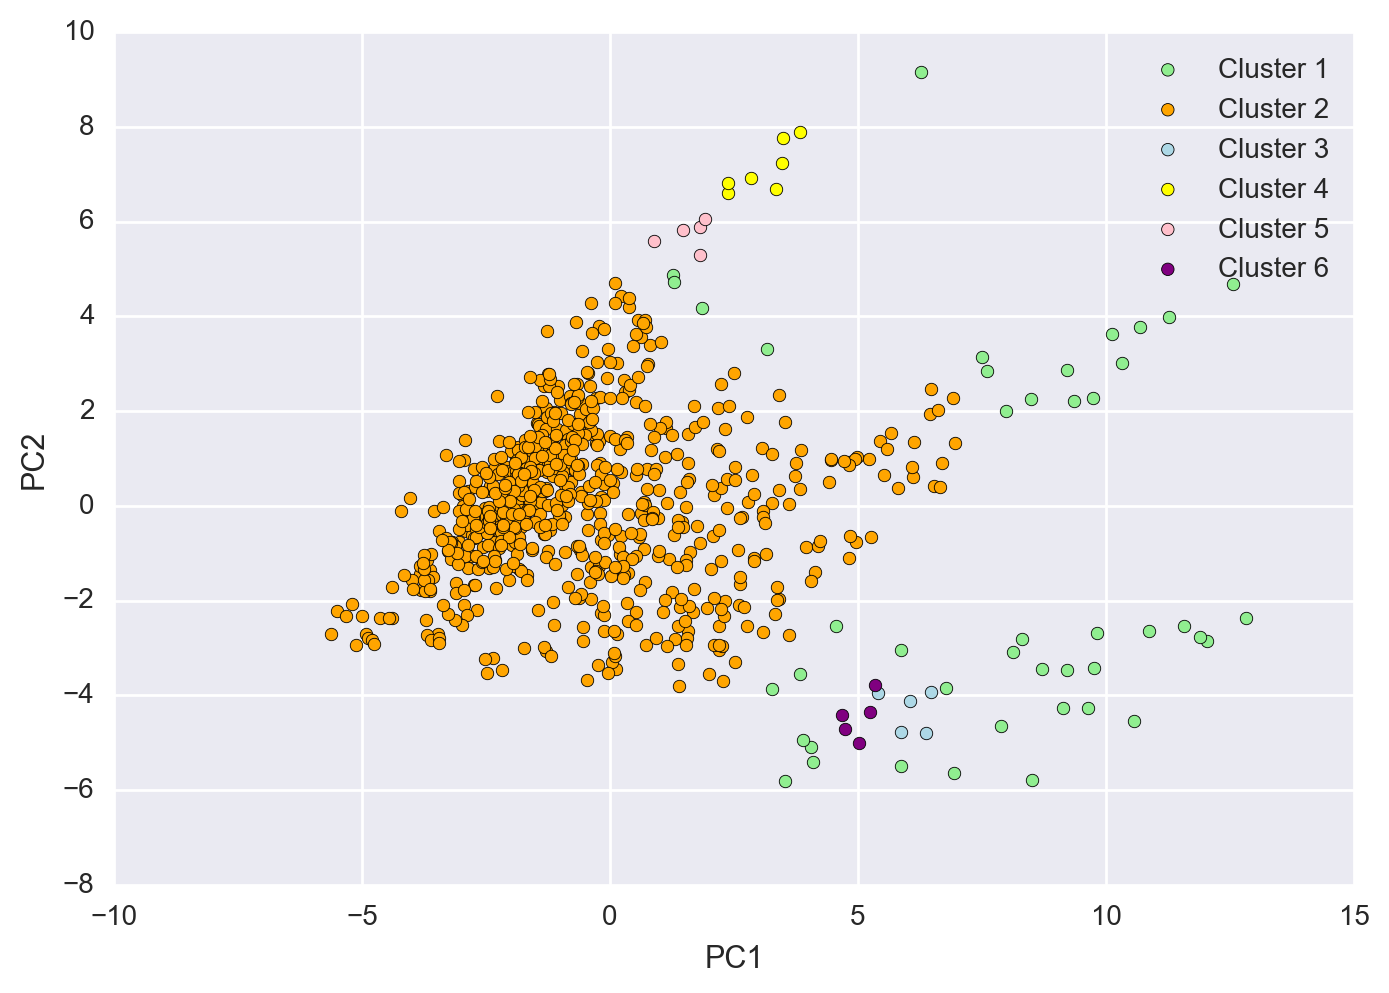

In [154]:
plt.scatter(X_pca[y_dbs==-1, 0],
           X_pca[y_dbs==-1, 1],
           c='lightgreen',
           label='Cluster 1')
plt.scatter(X_pca[y_dbs==0, 0],
           X_pca[y_dbs==0, 1],
           c='orange',
           label='Cluster 2')
plt.scatter(X_pca[y_dbs==1, 0],
           X_pca[y_dbs==1, 1],
           c='lightblue',
           label='Cluster 3')
plt.scatter(X_pca[y_dbs==2, 0],
           X_pca[y_dbs==2, 1],
           c='yellow',
           label='Cluster 4')
plt.scatter(X_pca[y_dbs==3, 0],
           X_pca[y_dbs==3, 1],
           c='pink',
           label='Cluster 5')
plt.scatter(X_pca[y_dbs==4, 0],
           X_pca[y_dbs==4, 1],
           c='purple',
           label='Cluster 6')

plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('/Users/gmaclenn/Desktop/dbscan_5_clusters.png', dpi=300)
print "DBSCAN does not appear to do much better, given that there's not a clear separation between points here "
print "There are also a number of bridge points ('noise') that's not allowing for clear seperation."
plt.show()

# Executive Summary:

#### * Large % of variables were highly correlated and explained the same variances. 

#### * Using PCA we are able to reduce dimensionality.
    * while still maintaining much of the explained variance.

### Possible explanations:
 
#### * The high correlation between departure delays and arrival delays on a number of the variables would lead me to suggest key areas of determining overall lateness revolved around the origination point of each flight.
    * Any sort of departure delay metric was generally highly correlated with arrival delay.
    * As flights are delayed coming in they're going to delay flights heading out.
        * staff turnaround time.
        * refueling
        * etc.
        
## Observations from other slides:
* New York airports are some of the worst offenders? What's the connection
* Is there a connection with weather and delays?
* Taxi out & Taxi in is much greater at very large airports.

# Possible Next Steps:

* Flight volume between airports. 
    * Is one airport's delay directly causing a delay at other airports?

In [52]:
km_c1 = all_data[y_km==0]
km_c2 = all_data[y_km==1]
km_c3 = all_data[y_km==2]

In [58]:
km_c1.to_csv('/Users/gmaclenn/Desktop/km_c1.csv')
km_c2.to_csv('/Users/gmaclenn/Desktop/km_c2.csv')
km_c3.to_csv('/Users/gmaclenn/Desktop/km_c3.csv')

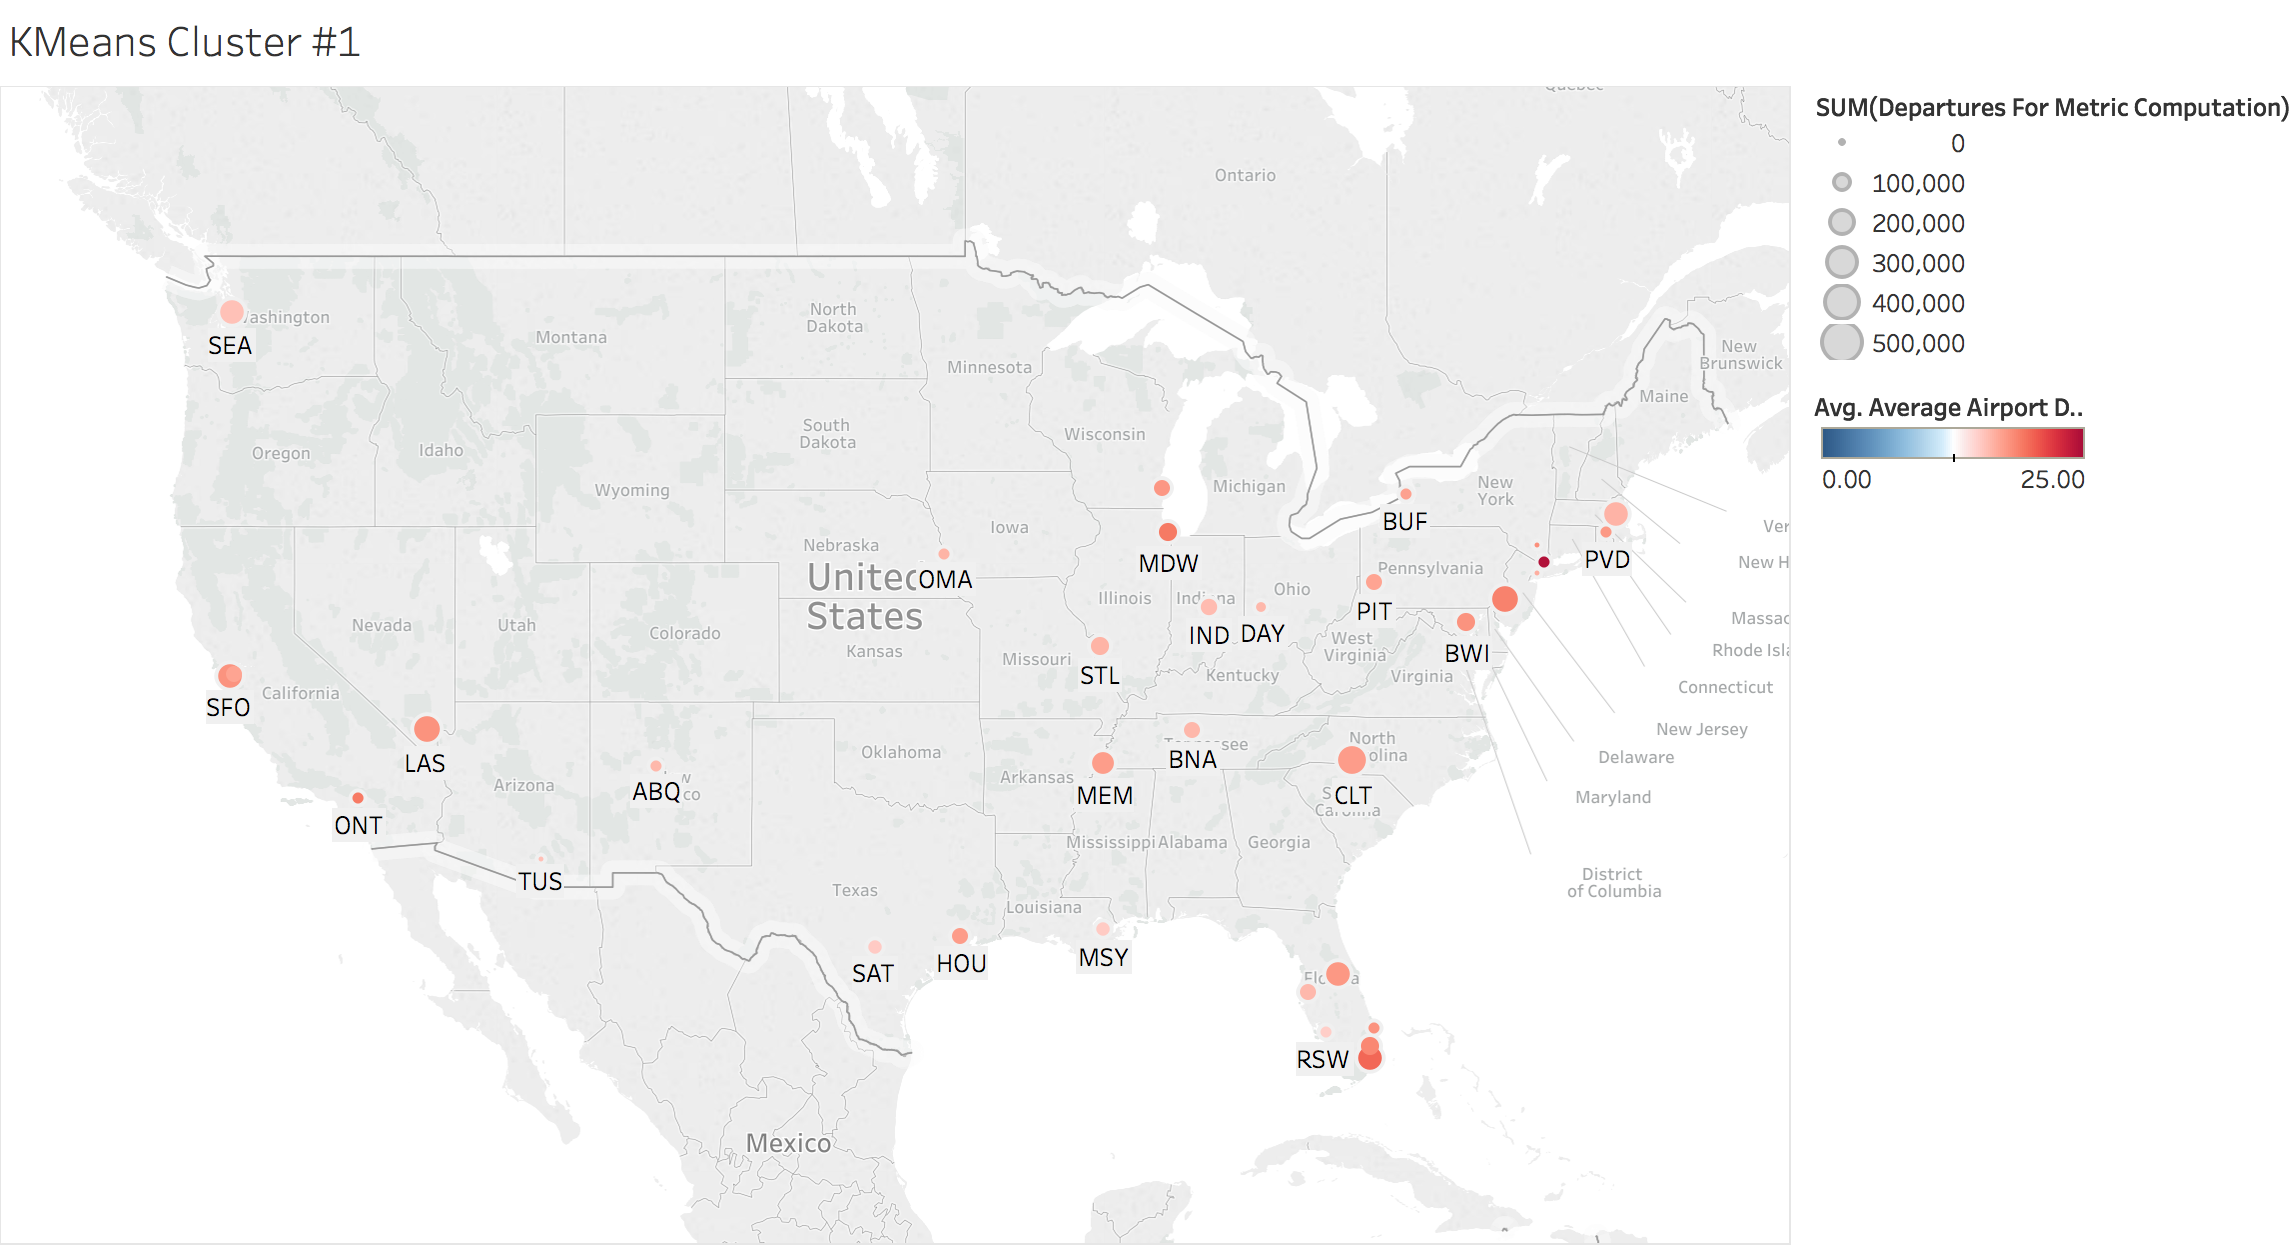

In [151]:
Image('/Users/gmaclenn/Desktop/kmeans_cluster_1.png')

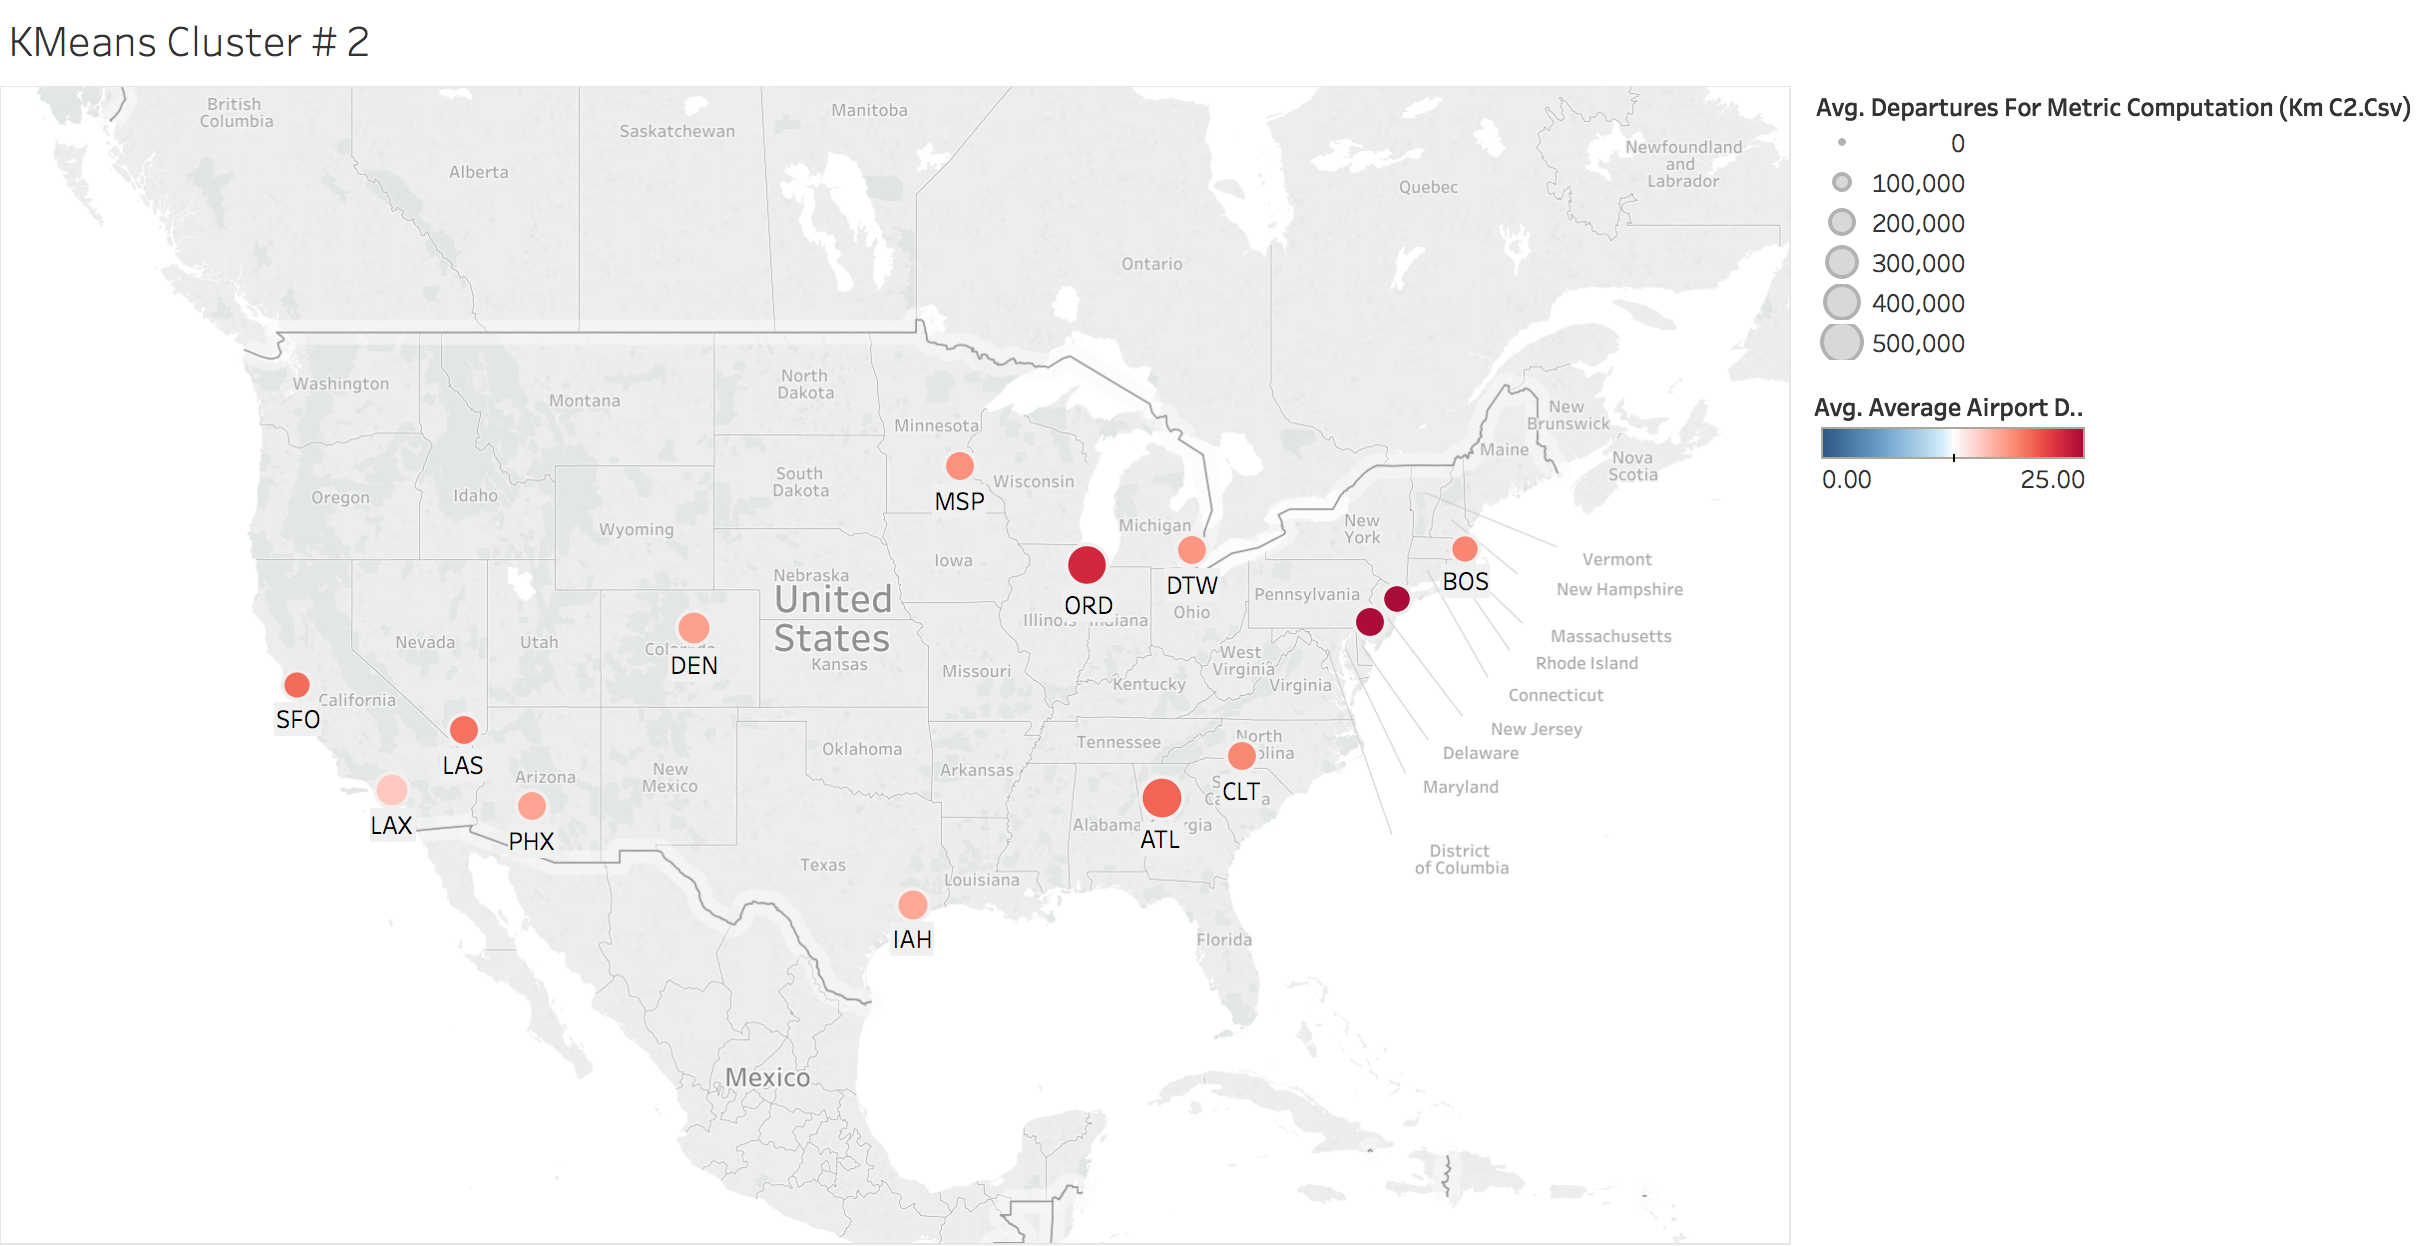

In [149]:
Image('/Users/gmaclenn/Desktop/kmeans_cluster_2.png')

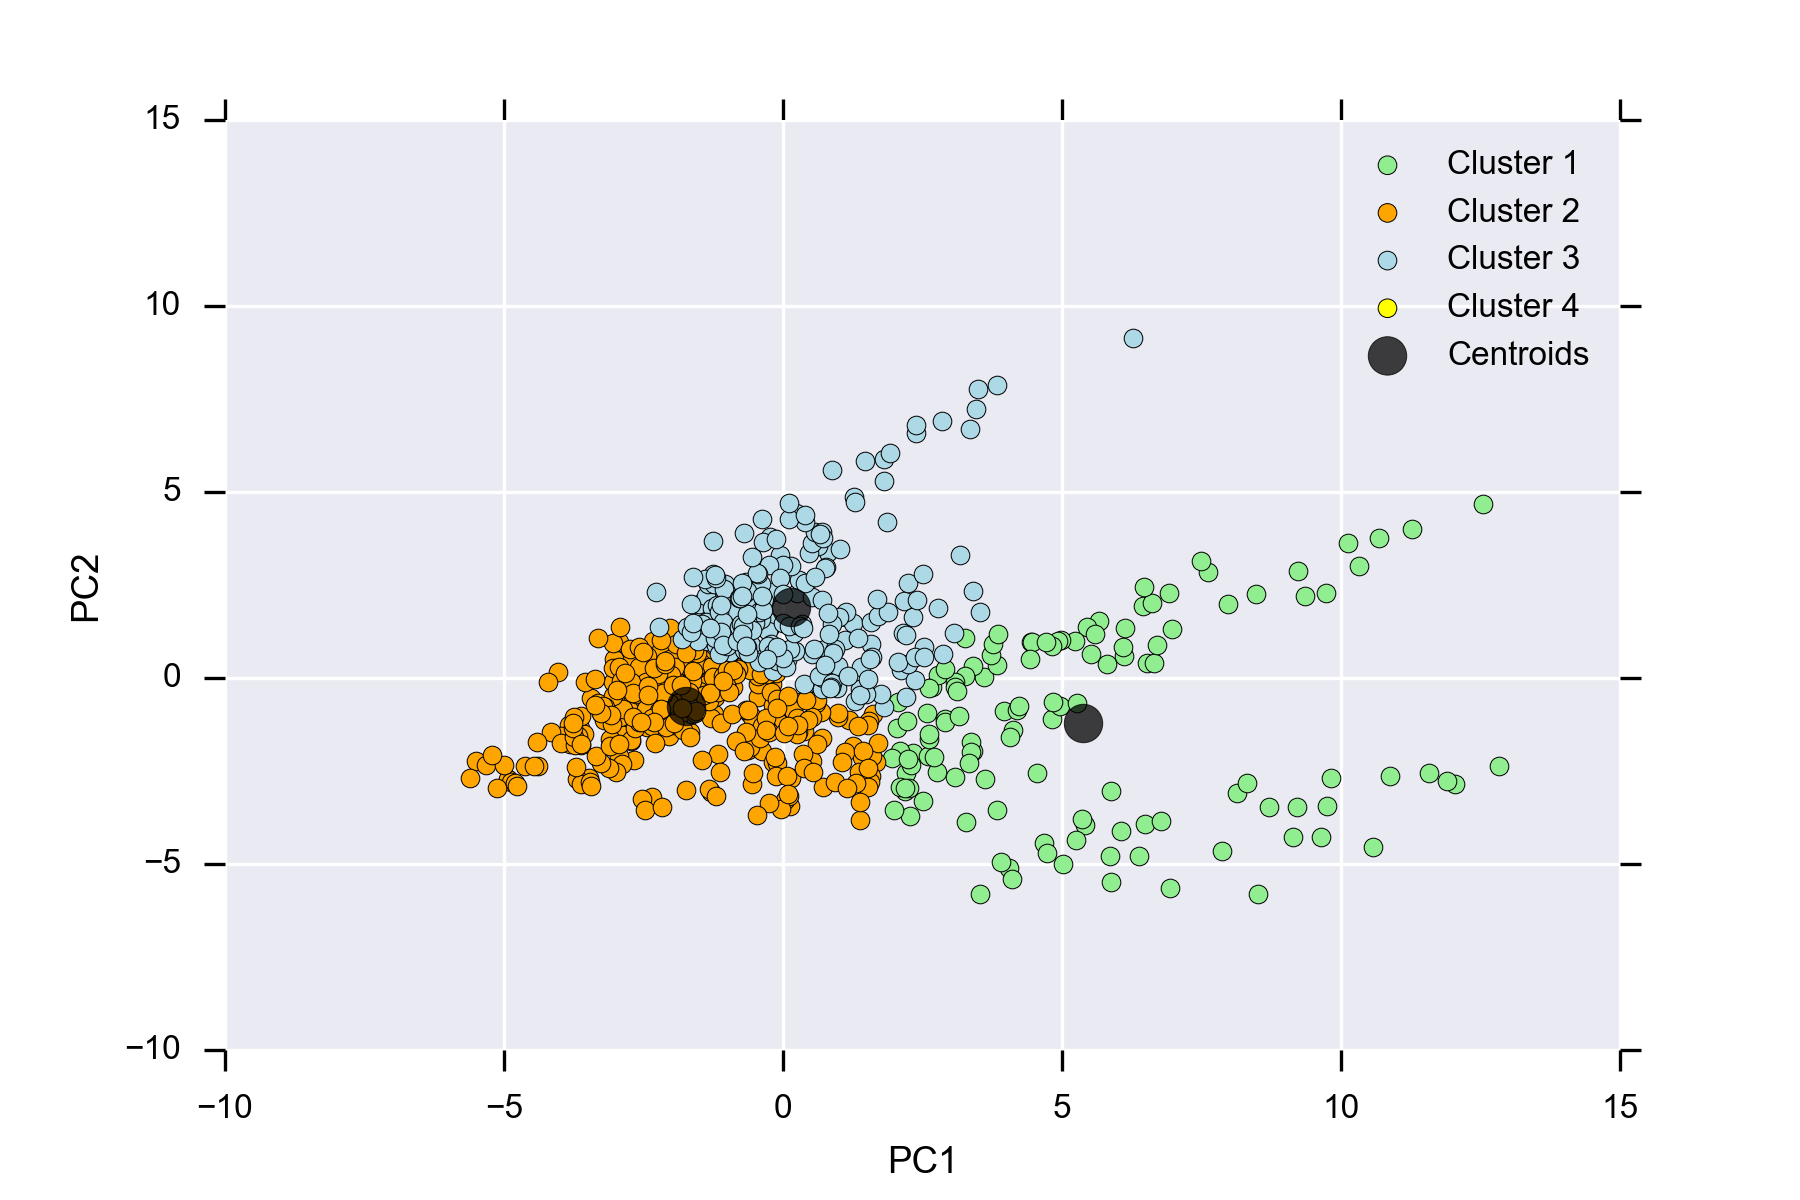

In [135]:
Image('/Users/gmaclenn/Desktop/3_clusters.png', height=600, width=600)

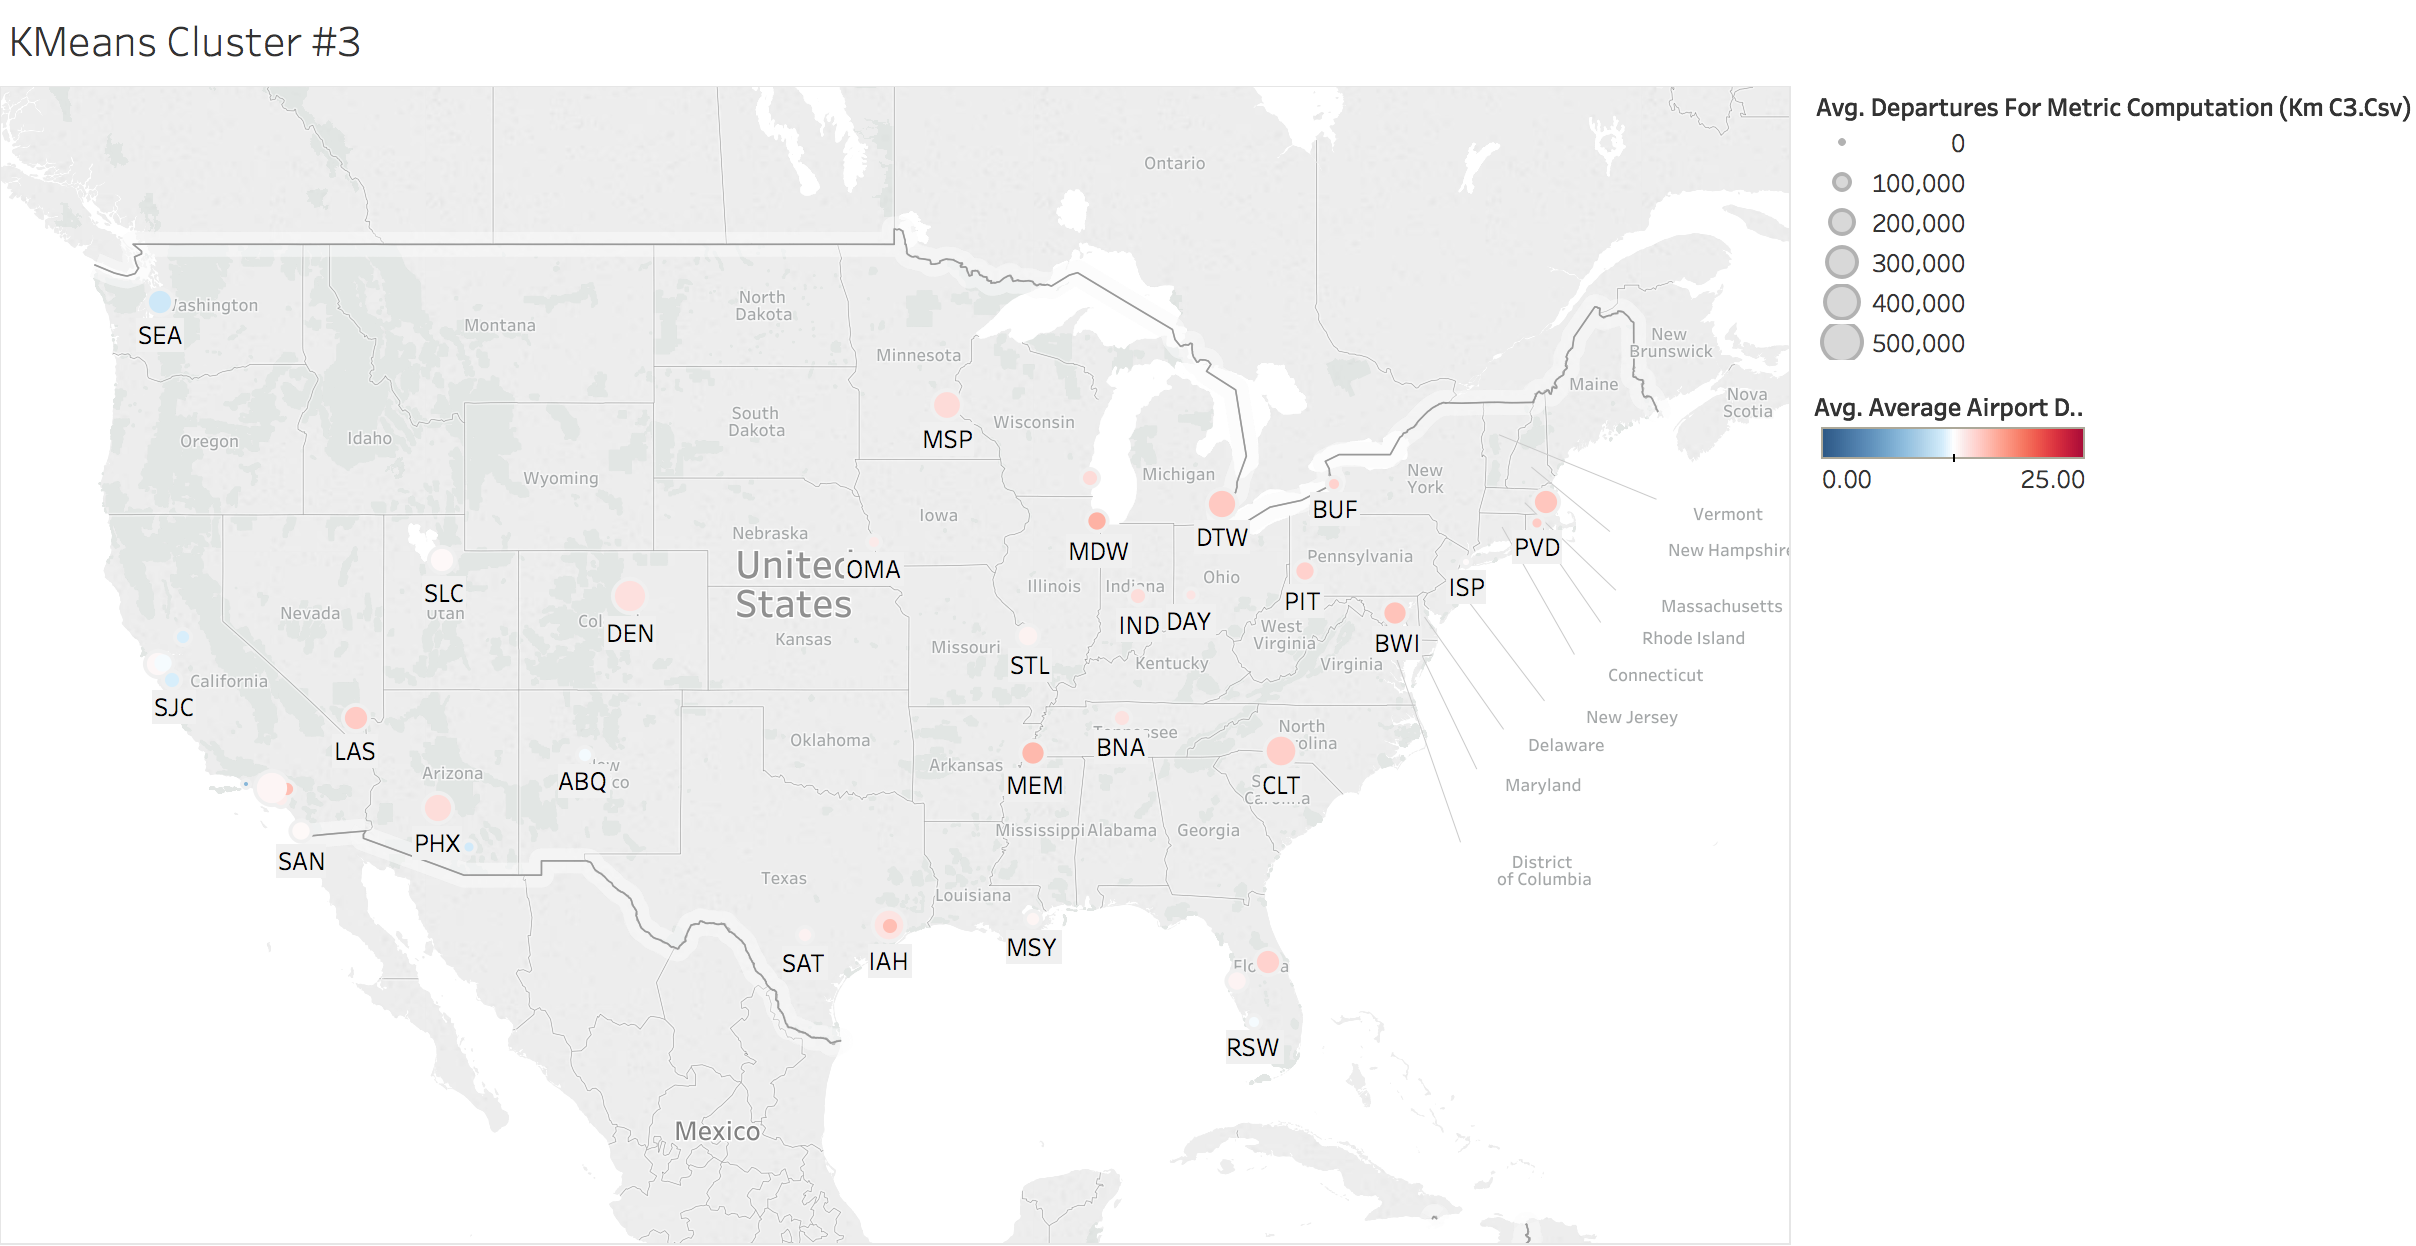

In [150]:
Image('/Users/gmaclenn/Desktop/kmeans_cluster_3.png')